<h1>Preprocessing and Exploratory Data Analysis<h1>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
import glob
import os 
import tensorflow as tf

from itertools import cycle
import itertools

from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
plt.style.use('Solarize_Light2')
color_pal=plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle=cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [ ]:
df_calendar = pd.read_csv("/content/drive/MyDrive/Tableau/calendar.csv")
df_sell_prices = pd.read_csv("/content/drive/MyDrive/Tableau/sell_prices.csv")
df_sales_train = pd.read_csv("/content/drive/MyDrive/Tableau/tableau_sales_train_evaluation_365_days.csv")
# df_calendar = pd.read_csv("/content/drive/MyDrive/calendar.csv")
# df_sell_prices = pd.read_csv("/content/drive/MyDrive/sell_prices.csv")
# df_sales_train = pd.read_csv("/content/drive/MyDrive/tableau_sales_train_evaluation_365_days.csv")

In [ ]:
def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype in ["int64", "int32"]]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df

In [ ]:
df_calendarr = pd.read_csv("/content/drive/MyDrive/Tableau/calenderr.csv")
df_sell_pricess = pd.read_csv("/content/drive/MyDrive/Tableau/sell_pricess.csv")
df_sales_trainn= pd.read_csv("/content/drive/MyDrive/Tableau/sales_train_evaluationn.csv")

In [ ]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [ ]:
df_calendar  = downcast_dtypes(df_calendar)
df_sell_prices = downcast_dtypes(df_sell_prices)
df_sales_train = downcast_dtypes(df_sales_train)

In [ ]:
#Calendar after Downcasting
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int16 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int16 
 4   month         1969 non-null   int16 
 5   year          1969 non-null   int16 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int16 
 12  snap_TX       1969 non-null   int16 
 13  snap_WI       1969 non-null   int16 
dtypes: int16(7), object(7)
memory usage: 134.7+ KB


In [ ]:
df_sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [ ]:
print("-----df_sell_prices-----")
print("item_id ->",len(df_sell_prices["item_id"].unique()))
print("store_id ->",len(df_sell_prices["store_id"].unique()))
print("wm_yr_wk ->",len(df_sell_prices["wm_yr_wk"].unique()))
print("")

-----df_sell_prices-----
item_id -> 3049
store_id -> 10
wm_yr_wk -> 282



In [ ]:
print("-----df_calendar-----")
print("wm_yr_wk ->",len(df_calendar["wm_yr_wk"].unique()))
print("")

-----df_calendar-----
wm_yr_wk -> 282



In [ ]:
print("-----df_sales_train-----")
print("item_id ->",len(df_sales_train["item_id"].unique()))
print("store_id ->",len(df_sales_train["store_id"].unique()))
print("")

-----df_sales_train-----
item_id -> 3049
store_id -> 10



In [ ]:
df_unpivot = pd.melt(df_sales_train, id_vars=["id","item_id","dept_id","cat_id","store_id","state_id"],var_name="day")
df_unpivot.head(8)

,id,item_id,dept_id,cat_id,store_id,state_id,day,value
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
5,HOBBIES_1_006_CA_1_evaluation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
6,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
7,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12


In [ ]:
cols_df = pd.DataFrame(df_sales_train.drop(["id","item_id","dept_id","cat_id","store_id","state_id"],inplace=False,axis=1).columns).set_axis(["d"], axis=1, inplace=False)
df_calendar = df_calendar.merge(cols_df,on="d",how="inner")
df_calendar = df_calendar[['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd','event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']]
df_calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN


In [ ]:
df_unpivot = df_unpivot.merge(df_calendar,left_on="day",right_on="d",how="left").drop(["id","day"],axis=1)

In [ ]:
# sns.heatmap(df_unpivot.isnull(), cbar=False)

In [ ]:
df_unpivot.head()

,item_id,dept_id,cat_id,store_id,state_id,value,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN
1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN
2,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN
3,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN
4,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN


In [ ]:
df_final = df_unpivot.merge(df_sell_prices,on=["item_id","store_id","wm_yr_wk"],how="left")

In [ ]:
df_final.head()

,item_id,dept_id,cat_id,store_id,state_id,value,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,sell_price
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,NaN
1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,NaN
2,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,NaN
3,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,NaN
4,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,NaN


In [ ]:
# df_final.to_csv("sales_merged.csv", encoding='utf-8', index=False)

In [ ]:
## event_name_1,event_type_1,event_name_2,event_type_2 have lots of null values. That is due to the fact that most of the events
## are festivals and celebrations that only occur on certain days.
pd.DataFrame(df_final.isnull().sum()).reset_index()

,index,0
0,item_id,0
1,dept_id,0
2,cat_id,0
3,store_id,0
4,state_id,0
5,value,0
6,date,0
7,wm_yr_wk,0
8,weekday,0
9,wday,0


In [ ]:
# sns.heatmap(df_final.isnull(), cbar=False)
import matplotlib.ticker as ticker

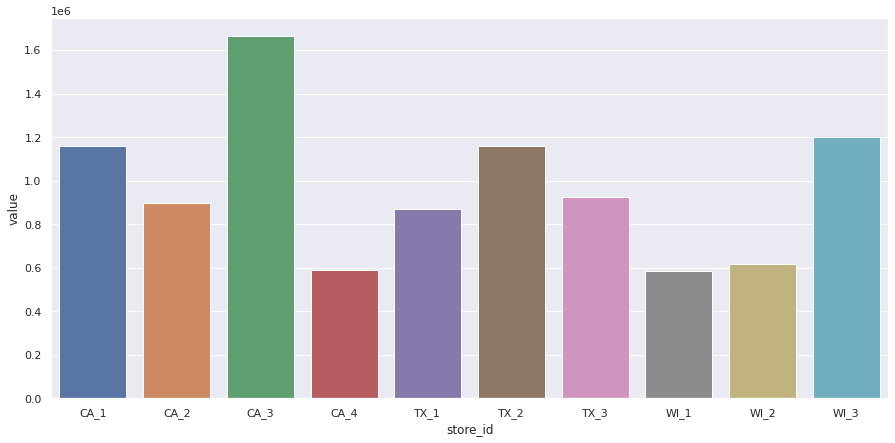

In [ ]:
df_temp = pd.DataFrame(df_final.groupby(["store_id"])["value"].sum()).reset_index()
# f,ax=plt.subplots(1,1,figsize=(15,7))

# scale_y = 1e6
# ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
# ax.yaxis.set_major_formatter(ticks_y)

sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(data=df_temp, x="store_id", y="value")
# ax.set_ylabel("Total Sales")
plt.show()

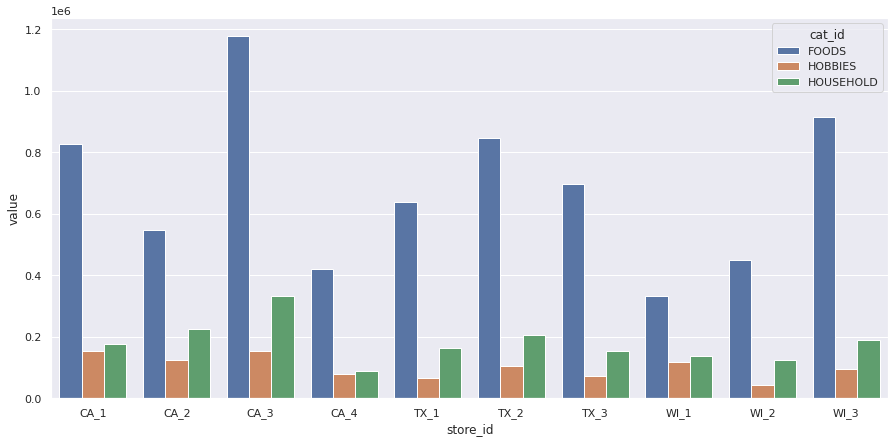

In [ ]:
df_temp = pd.DataFrame(df_final.groupby(["store_id","cat_id"])["value"].sum()).reset_index()
df_temp.head()
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(data=df_temp, x="store_id", y="value",hue="cat_id")

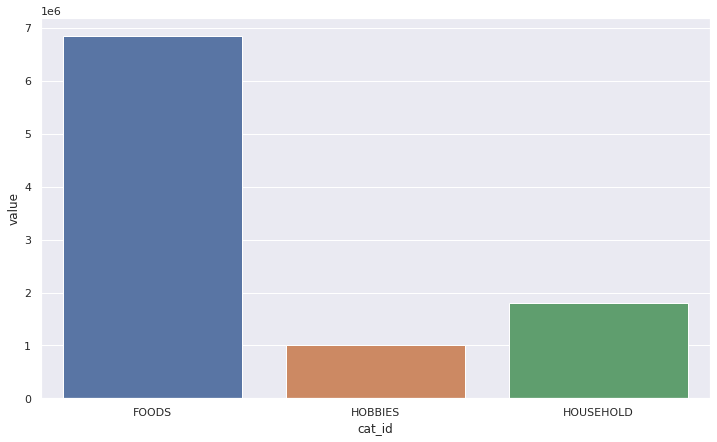

In [ ]:
df_temp = pd.DataFrame(df_final.groupby(["cat_id"])["value"].sum()).reset_index()
df_temp.head()
sns.set(rc={'figure.figsize':(12,7)})
sns.barplot(data=df_temp, x="cat_id", y="value")

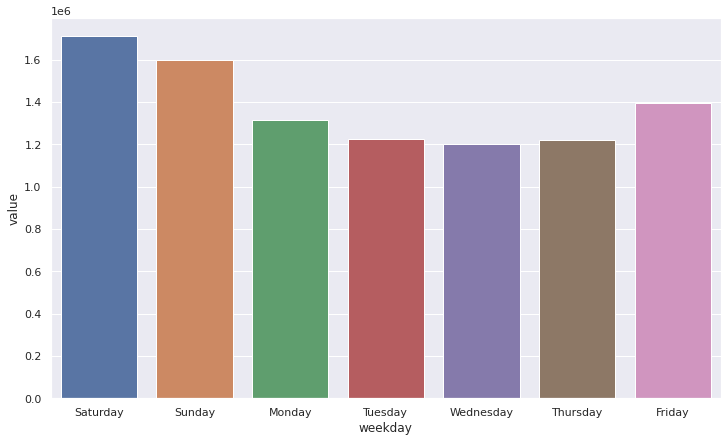

In [ ]:
df_temp = pd.DataFrame(df_final.groupby(["weekday","wday"])["value"].sum()).reset_index().sort_values(["wday"])
df_temp.head()
sns.set(rc={'figure.figsize':(12,7)})
sns.barplot(data=df_temp, x="weekday", y="value")

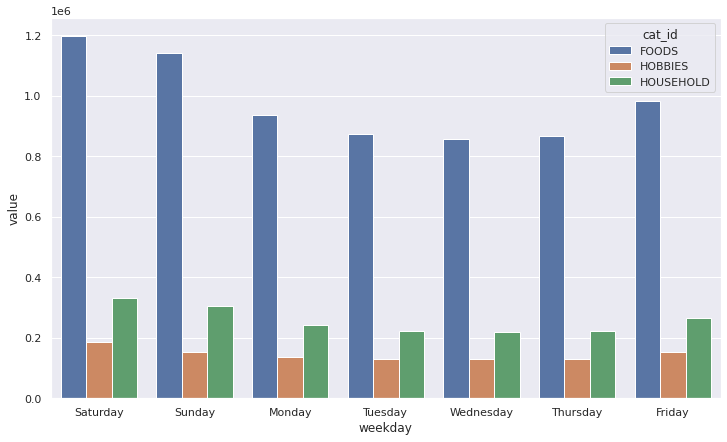

In [ ]:
df_temp = pd.DataFrame(df_final.groupby(["weekday","wday","cat_id"])["value"].sum()).reset_index().sort_values(["wday"])
df_temp.head()
sns.set(rc={'figure.figsize':(12,7)})
sns.barplot(data=df_temp, x="weekday", y="value",hue="cat_id")

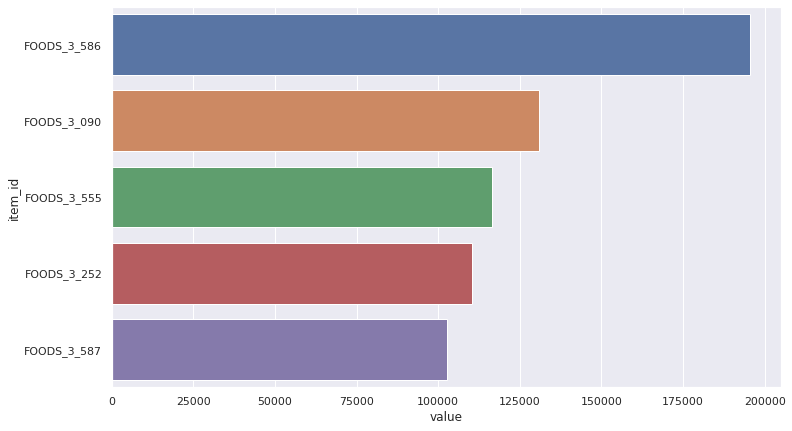

In [ ]:
df_temp = pd.DataFrame(df_final.groupby(["item_id"])["value"].sum()).reset_index()

sns.barplot(
    y='item_id',
    x='value',
    data=df_temp.nlargest(5, 'value')
)

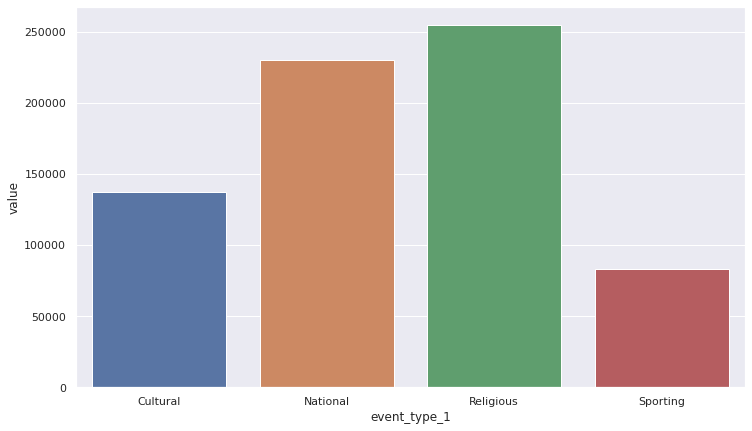

In [ ]:
df_temp = df_final[~df_final["event_type_1"].isna()] 
df_temp.head()
df_temp = pd.DataFrame(df_final.groupby(["event_type_1"])["value"].sum()).reset_index()

sns.set(rc={'figure.figsize':(12,7)})
sns.barplot(data=df_temp, x="event_type_1", y="value")

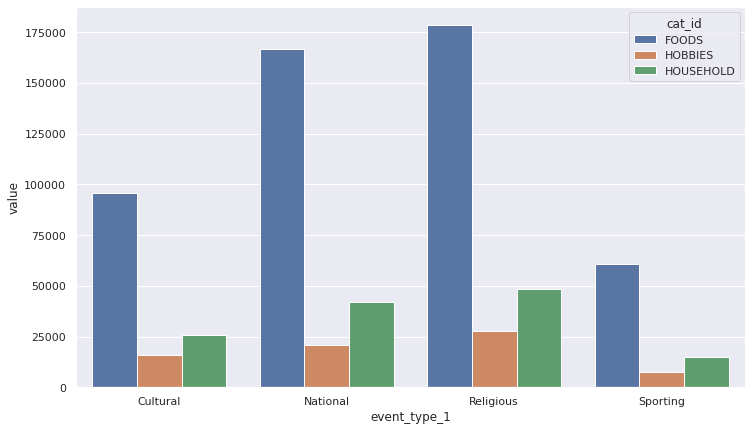

In [ ]:
df_temp = df_final[~df_final["event_type_1"].isna()] 
df_temp.head()
df_temp = pd.DataFrame(df_final.groupby(["cat_id","event_type_1"])["value"].sum()).reset_index()

sns.set(rc={'figure.figsize':(12,7)})
sns.barplot(data=df_temp, x="event_type_1", y="value",hue="cat_id")

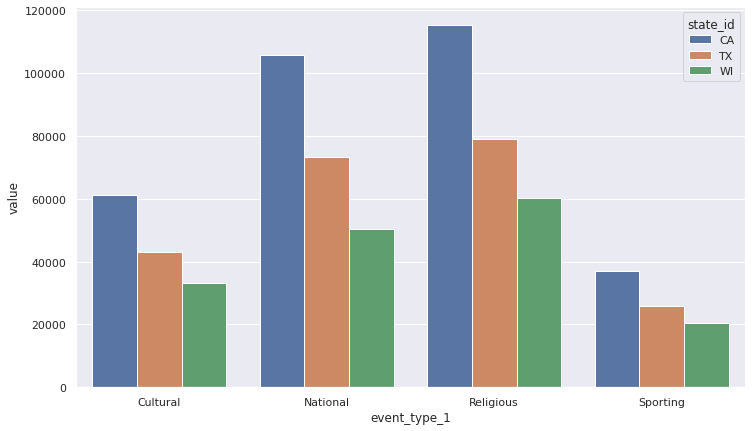

In [ ]:
df_temp = df_final[~df_final["event_type_1"].isna()] 
df_temp.head()
df_temp = pd.DataFrame(df_final.groupby(["state_id","event_type_1"])["value"].sum()).reset_index()

sns.set(rc={'figure.figsize':(12,7)})
sns.barplot(data=df_temp, x="event_type_1", y="value",hue="state_id")

<h1>Weather Data<h1>

In [ ]:
df_weather = pd.read_csv("/content/drive/MyDrive/Tableau/weather_data/weathers.csv")

In [ ]:
df_weather.head()

,STATION,NAME,DATE,AWND,DAPR,EVAP,FMTM,MDPR,PGTM,PRCP,...,WT10,WT11,WT13,WT14,WT15,WT16,WT18,WT19,WT21,WT22
0,USR0000CDIA,"DIABLO GRANDE CALIFORNIA, CA US",2011-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USR0000CDIA,"DIABLO GRANDE CALIFORNIA, CA US",2011-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USR0000CDIA,"DIABLO GRANDE CALIFORNIA, CA US",2011-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USR0000CDIA,"DIABLO GRANDE CALIFORNIA, CA US",2011-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USR0000CDIA,"DIABLO GRANDE CALIFORNIA, CA US",2011-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


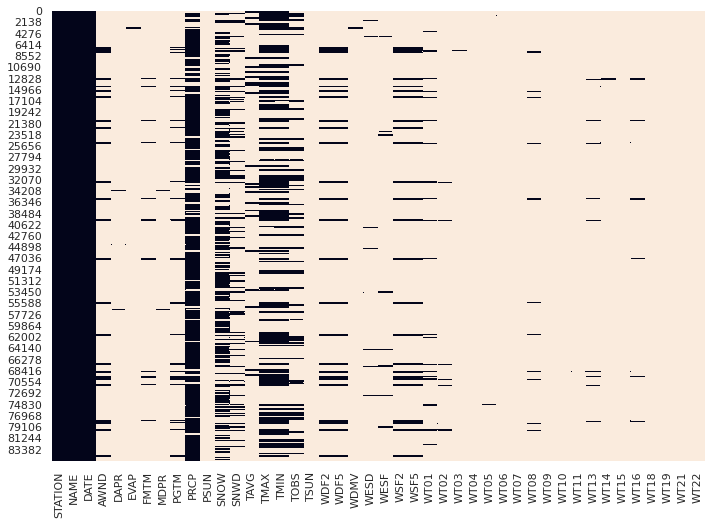

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df_weather.isnull(), cbar=False)

In [ ]:
df_weather = df_weather[['NAME', 'DATE','PRCP','SNOW','TMAX','TMIN']]

In [ ]:
df_weather.head()

,NAME,DATE,PRCP,SNOW,TMAX,TMIN
0,"DIABLO GRANDE CALIFORNIA, CA US",2011-01-29,NaN,NaN,56.0,40.0
1,"DIABLO GRANDE CALIFORNIA, CA US",2011-01-30,NaN,NaN,47.0,42.0
2,"DIABLO GRANDE CALIFORNIA, CA US",2011-01-31,NaN,NaN,53.0,44.0
3,"DIABLO GRANDE CALIFORNIA, CA US",2011-02-01,NaN,NaN,56.0,46.0
4,"DIABLO GRANDE CALIFORNIA, CA US",2011-02-02,NaN,NaN,54.0,41.0


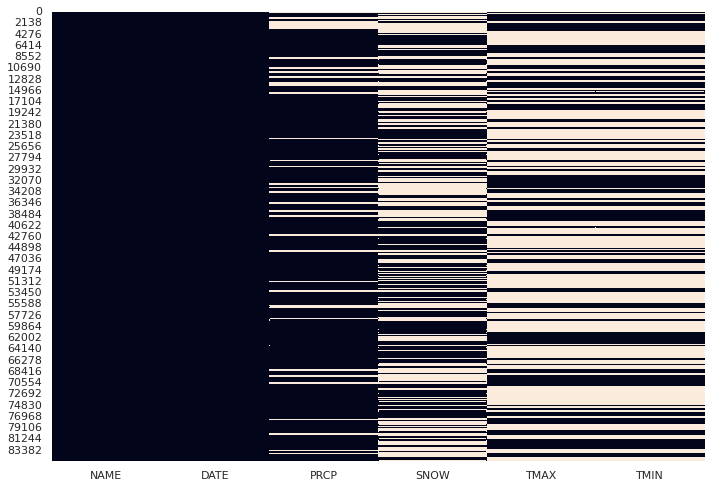

In [ ]:
sns.heatmap(df_weather.isnull(), cbar=False)

In [ ]:
sublist = ["LONG BEACH DAUGHERTY AIRPORT","SAN FRANCISCO INTERNATIONAL AIRPORT","SAN JOSE, CA US","SAN DIEGO BROWN FIELD","DALLAS REDBIRD AIRPORT","MADISON DANE CO REGIONAL AIRPORT","MILWAUKEE MITCHELL AIRPORT"]
mylist = df_weather["NAME"].unique().tolist()

stations = {}
for sub in sublist:
    print("\n".join(s for s in mylist if sub.lower() in s.lower()))
    key = "\n".join(s for s in mylist if sub.lower() in s.lower())
    stations[key]="CA_1"

LONG BEACH DAUGHERTY AIRPORT, CA US
SAN FRANCISCO INTERNATIONAL AIRPORT, CA US
SAN JOSE, CA US
SAN DIEGO BROWN FIELD, CA US
DALLAS REDBIRD AIRPORT, TX US
MADISON DANE CO REGIONAL AIRPORT, WI US
MILWAUKEE MITCHELL AIRPORT, WI US


In [ ]:
stations = {'CA_1':'LONG BEACH DAUGHERTY AIRPORT, CA US',
 'CA_4':'SAN FRANCISCO INTERNATIONAL AIRPORT, CA US',
 'CA_2':'SAN JOSE, CA US',
 'CA_3':'SAN DIEGO BROWN FIELD, CA US',
 'TX_1':'DALLAS REDBIRD AIRPORT, TX US',
 'TX_2':'DALLAS REDBIRD AIRPORT, TX US',
 'TX_3':'DALLAS REDBIRD AIRPORT, TX US',           
 'WI_3':'MADISON DANE CO REGIONAL AIRPORT, WI US',
 'WI_1':'MILWAUKEE MITCHELL AIRPORT, WI US',
 'WI_2':'MILWAUKEE MITCHELL AIRPORT, WI US'}

df_temp  = pd.DataFrame(stations.items(),columns = ["store_id","NAME"])
df_temp

,store_id,NAME
0,CA_1,"LONG BEACH DAUGHERTY AIRPORT, CA US"
1,CA_4,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US"
2,CA_2,"SAN JOSE, CA US"
3,CA_3,"SAN DIEGO BROWN FIELD, CA US"
4,TX_1,"DALLAS REDBIRD AIRPORT, TX US"
5,TX_2,"DALLAS REDBIRD AIRPORT, TX US"
6,TX_3,"DALLAS REDBIRD AIRPORT, TX US"
7,WI_3,"MADISON DANE CO REGIONAL AIRPORT, WI US"
8,WI_1,"MILWAUKEE MITCHELL AIRPORT, WI US"
9,WI_2,"MILWAUKEE MITCHELL AIRPORT, WI US"


In [ ]:
df_weather = df_weather.merge(df_temp,on=["NAME"],how="right")

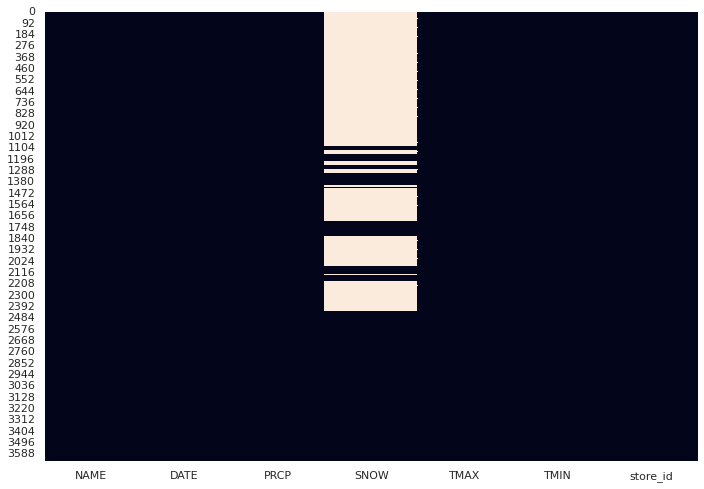

In [ ]:
sns.heatmap(df_weather.isnull(), cbar=False)

In [ ]:
df_weather["SNOW"].fillna(0,inplace=True)
df_weather["SNOW"] = df_weather["SNOW"].apply(lambda x:1 if x>0 else 0)
df_weather["PRCP"] = df_weather["PRCP"].apply(lambda x:1 if x>0 else 0)

In [ ]:
df_weather.drop(["NAME"],inplace=True,axis=1)

In [ ]:
df_final = df_final.merge(df_weather,left_on=["date","store_id"],right_on=["DATE","store_id"],how="left")

In [ ]:
df_final.drop(["d","wm_yr_wk","DATE"],axis=1,inplace=True)

<h1>Median Income Data<h1>

In [ ]:
import glob
import os


path = r'/content/drive/MyDrive/Tableau/median_incomes'

# path = r'/content/drive/MyDrive/median_incomes'

all_files = glob.glob(os.path.join(path , "*.csv"))
# print(all_files)

li = []

for filename in all_files:
    print(filename)
    df = pd.read_csv(filename)
    print(df.columns[1].split(" ")[1].split("!")[0])
    code = df.columns[1].split(" ")[1].split("!")[0]
    df.set_axis(['label', 'Total', 'median_income'], axis=1, inplace=True)
    df = df.pivot_table(values="median_income", index=df.index, columns='label', aggfunc='first')
    fltr = df.describe().reset_index()["index"]=="top"
    df = df.describe().reset_index()[fltr]
    df["code"]=code
    li.append(df)

df_income = pd.concat(li, axis=0, ignore_index=True)
df_income["Households"] = df_income["Households"].apply(lambda x:float(x.replace(",","")))

/content/drive/MyDrive/Tableau/median_incomes/ACSST5Y2012.S1903-2022-11-15T063459.csv
90804
/content/drive/MyDrive/Tableau/median_incomes/ACSST5Y2012.S1903-2022-11-15T063550.csv
95032
/content/drive/MyDrive/Tableau/median_incomes/ACSST5Y2012.S1903-2022-11-15T063636.csv
92107
/content/drive/MyDrive/Tableau/median_incomes/ACSST5Y2012.S1903-2022-11-15T063854.csv
94536
/content/drive/MyDrive/Tableau/median_incomes/ACSST5Y2012.S1903-2022-11-15T064013.csv
75032
/content/drive/MyDrive/Tableau/median_incomes/ACSST5Y2012.S1903-2022-11-15T064207.csv
75034
/content/drive/MyDrive/Tableau/median_incomes/ACSST5Y2012.S1903-2022-11-15T064257.csv
75048
/content/drive/MyDrive/Tableau/median_incomes/ACSST5Y2012.S1903-2022-11-15T064441.csv
53094
/content/drive/MyDrive/Tableau/median_incomes/ACSST5Y2012.S1903-2022-11-15T064527.csv
53092
/content/drive/MyDrive/Tableau/median_incomes/ACSST5Y2012.S1903-2022-11-15T064614.csv
53091


In [ ]:
df_income = df_income[["Households","code"]].set_axis(["median_income","code"],axis=1,inplace=False)

zipcodes = {    
"CA_1":'90804',
"CA_2":'95032',
"CA_3":'92107',
"CA_4":'94536',
"TX_1":'75032',
"TX_2":'75034',
"TX_3":'75048',
"WI_1":'53094',
"WI_2":'53092',
"WI_3":'53091'
}

df_temp  = pd.DataFrame(zipcodes.items(),columns = ["store_id","code"])
df_income = df_income.merge(df_temp,on = ["code"],how = "inner")
df_income.drop(["code"],axis=1,inplace=True)
df_final  = df_final.merge(df_income,on=["store_id"],how="inner")

In [ ]:
df_final.head()
# df_final.to_csv("data_final.csv", encoding='utf-8',index=False)

,item_id,dept_id,cat_id,store_id,state_id,value,date,weekday,wday,month,...,event_name_1,event_type_1,event_name_2,event_type_2,sell_price,PRCP,SNOW,TMAX,TMIN,median_income
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,Saturday,1,1,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,62.0,46.0,41642.0
1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,Saturday,1,1,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,62.0,46.0,41642.0
2,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,Saturday,1,1,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,62.0,46.0,41642.0
3,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,Saturday,1,1,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,62.0,46.0,41642.0
4,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,Saturday,1,1,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,62.0,46.0,41642.0


In [ ]:
df_final.head()

,item_id,dept_id,cat_id,store_id,state_id,value,date,weekday,wday,month,...,event_name_1,event_type_1,event_name_2,event_type_2,sell_price,PRCP,SNOW,TMAX,TMIN,median_income
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,Saturday,1,1,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,62.0,46.0,41642.0
1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,Saturday,1,1,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,62.0,46.0,41642.0
2,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,Saturday,1,1,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,62.0,46.0,41642.0
3,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,Saturday,1,1,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,62.0,46.0,41642.0
4,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,Saturday,1,1,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,62.0,46.0,41642.0


In [ ]:
df_final.columns

Index(['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'value', 'date',
       'weekday', 'wday', 'month', 'year', 'event_name_1', 'event_type_1',
       'event_name_2', 'event_type_2', 'sell_price', 'PRCP', 'SNOW', 'TMAX',
       'TMIN', 'median_income'],
      dtype='object')

In [ ]:
df_final[['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'value', 'date','sell_price', 'PRCP', 'SNOW', 'TMAX',
       'TMIN', 'median_income']].sort_values(["median_income"])

,item_id,dept_id,cat_id,store_id,state_id,value,date,sell_price,PRCP,SNOW,TMAX,TMIN,median_income
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,NaN,0.0,0.0,62.0,46.0,41642.0
741915,HOUSEHOLD_1_453,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,0,2011-09-29,NaN,0.0,0.0,80.0,61.0,41642.0
741916,HOUSEHOLD_1_454,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,0,2011-09-29,NaN,0.0,0.0,80.0,61.0,41642.0
741917,HOUSEHOLD_1_455,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,0,2011-09-29,NaN,0.0,0.0,80.0,61.0,41642.0
741918,HOUSEHOLD_1_456,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,0,2011-09-29,NaN,0.0,0.0,80.0,61.0,41642.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854800,HOUSEHOLD_1_453,HOUSEHOLD_1,HOUSEHOLD,CA_2,CA,0,2011-09-29,NaN,0.0,0.0,79.0,62.0,122512.0
1854799,HOUSEHOLD_1_452,HOUSEHOLD_1,HOUSEHOLD,CA_2,CA,1,2011-09-29,3.47,0.0,0.0,79.0,62.0,122512.0
1854798,HOUSEHOLD_1_451,HOUSEHOLD_1,HOUSEHOLD,CA_2,CA,0,2011-09-29,NaN,0.0,0.0,79.0,62.0,122512.0
1854812,HOUSEHOLD_1_465,HOUSEHOLD_1,HOUSEHOLD,CA_2,CA,0,2011-09-29,NaN,0.0,0.0,79.0,62.0,122512.0


In [ ]:
df_final.shape

(11128850, 21)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11128850 entries, 0 to 11128849
Data columns (total 21 columns):
 #   Column         Dtype  
---  ------         -----  
 0   item_id        object 
 1   dept_id        object 
 2   cat_id         object 
 3   store_id       object 
 4   state_id       object 
 5   value          int16  
 6   date           object 
 7   weekday        object 
 8   wday           int16  
 9   month          int16  
 10  year           int16  
 11  event_name_1   object 
 12  event_type_1   object 
 13  event_name_2   object 
 14  event_type_2   object 
 15  sell_price     float32
 16  PRCP           float64
 17  SNOW           float64
 18  TMAX           float64
 19  TMIN           float64
 20  median_income  float64
dtypes: float32(1), float64(5), int16(4), object(11)
memory usage: 1.5+ GB


In [ ]:
df_calendar['date'] = pd.to_datetime(df_calendar['date'])

<h1> ABC Analysis<h1>

In [ ]:
df_household = df_final[df_final["cat_id"]=='HOUSEHOLD']

In [ ]:
df_household.columns

Index(['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'value', 'date',
       'weekday', 'wday', 'month', 'year', 'event_name_1', 'event_type_1',
       'event_name_2', 'event_type_2', 'sell_price', 'PRCP', 'SNOW', 'TMAX',
       'TMIN', 'median_income'],
      dtype='object')

In [ ]:
df_temp = df_household[["item_id","value","sell_price"]]
df_temp.rename(columns={'value': 'sales'}, inplace=True)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
df_temp = df_temp[~ df_temp["sell_price"].isna()]

In [ ]:
df_temp.head()

,item_id,sales,sell_price
565,HOUSEHOLD_1_001,3,6.32
566,HOUSEHOLD_1_002,1,6.32
568,HOUSEHOLD_1_004,4,1.98
569,HOUSEHOLD_1_005,0,10.72
575,HOUSEHOLD_1_011,1,4.63


In [ ]:
df_temp["revenue"] = df_temp.apply(lambda x:x['sales'] * x['sell_price'],axis=1)

In [ ]:
df_temp = df_temp[df_temp["revenue"]!=0]

In [ ]:
df_temp.head()

,item_id,sales,sell_price,revenue
565,HOUSEHOLD_1_001,3,6.32,18.960001
566,HOUSEHOLD_1_002,1,6.32,6.320000
568,HOUSEHOLD_1_004,4,1.98,7.920000
575,HOUSEHOLD_1_011,1,4.63,4.630000
589,HOUSEHOLD_1_025,2,2.98,5.960000


In [ ]:
def ABC_segmentation(RunPerc):
    if RunPerc > 0 and RunPerc < 0.6:
        return 'A'
    elif RunPerc >=0.6 and RunPerc < 0.85:
        return 'B'
    elif RunPerc >=0.85:
        return 'C'

In [ ]:
df_temp = df_temp.sort_values(by=['revenue'], ascending=False)

In [ ]:
df_temp['RunCumCost'] = df_temp['revenue'].cumsum()
df_temp['TotSum'] = df_temp['revenue'].sum()
df_temp['RunPerc'] = df_temp['RunCumCost'] / df_temp['TotSum']
df_temp['Class'] = df_temp['RunPerc'].apply(ABC_segmentation)
df_temp

,item_id,sales,sell_price,revenue,RunCumCost,TotSum,RunPerc,Class
3095784,HOUSEHOLD_1_494,57,7.97,454.289988,4.542900e+02,7.471258e+06,0.000061,A
495028,HOUSEHOLD_1_535,57,6.97,397.289988,8.515800e+02,7.471258e+06,0.000114,A
2443080,HOUSEHOLD_1_272,35,9.97,348.950009,1.200530e+03,7.471258e+06,0.000161,A
2269071,HOUSEHOLD_1_053,23,14.97,344.310006,1.544840e+03,7.471258e+06,0.000207,A
2961561,HOUSEHOLD_1_427,56,5.96,333.760002,1.878600e+03,7.471258e+06,0.000251,A
...,...,...,...,...,...,...,...,...
6163495,HOUSEHOLD_2_371,1,0.78,0.780000,7.471255e+06,7.471258e+06,1.000000,C
4257870,HOUSEHOLD_2_371,1,0.78,0.780000,7.471255e+06,7.471258e+06,1.000000,C
10310135,HOUSEHOLD_2_371,1,0.78,0.780000,7.471256e+06,7.471258e+06,1.000000,C
6245818,HOUSEHOLD_2_371,1,0.78,0.780000,7.471257e+06,7.471258e+06,1.000000,C


In [ ]:
df_temp[["item_id","sales","sell_price","revenue","Class"]]

,item_id,sales,sell_price,revenue,Class
3095784,HOUSEHOLD_1_494,57,7.97,454.289988,A
495028,HOUSEHOLD_1_535,57,6.97,397.289988,A
2443080,HOUSEHOLD_1_272,35,9.97,348.950009,A
2269071,HOUSEHOLD_1_053,23,14.97,344.310006,A
2961561,HOUSEHOLD_1_427,56,5.96,333.760002,A
...,...,...,...,...,...
6163495,HOUSEHOLD_2_371,1,0.78,0.780000,C
4257870,HOUSEHOLD_2_371,1,0.78,0.780000,C
10310135,HOUSEHOLD_2_371,1,0.78,0.780000,C
6245818,HOUSEHOLD_2_371,1,0.78,0.780000,C


In [ ]:
df_temp.Class.value_counts()

C    303277
B    234279
A    198865
Name: Class, dtype: int64

In [ ]:
print('Cost of Class A:', df_temp[df_temp.Class == 'A']['revenue'].sum())
print('Cost of Class B:', df_temp[df_temp.Class == 'B']['revenue'].sum())
print('Cost of Class C:', df_temp[df_temp.Class == 'C']['revenue'].sum())

Cost of Class A: 4482753.738527
Cost of Class B: 1867811.3132520318
Cost of Class C: 1120692.4770283997


In [ ]:
# percent of total cost per class
print('Percent of Cost of A:',df_temp[df_temp.Class == 'A']['revenue'].sum()/df_temp['revenue'].sum())
print('Percent of Cost of B:',df_temp[df_temp.Class == 'B']['revenue'].sum()/df_temp['revenue'].sum())
print('Percent of Cost of C:',df_temp[df_temp.Class == 'C']['revenue'].sum()/df_temp['revenue'].sum())

Percent of Cost of A: 0.5999998957662139
Percent of Cost of B: 0.24999958923249344
Percent of Cost of C: 0.15000051500129263


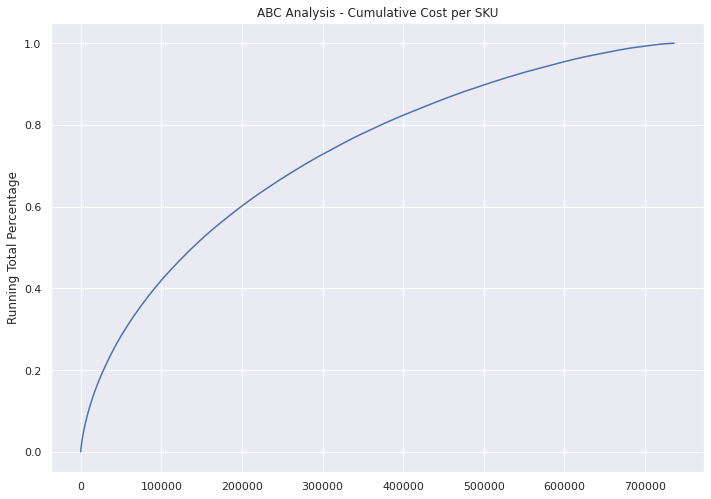

In [ ]:
performance = df_temp['RunPerc'].tolist()
y_pos = np.arange(len(performance))

plt.plot(y_pos,performance)
plt.ylabel('Running Total Percentage')
plt.title('ABC Analysis - Cumulative Cost per SKU')
plt.grid(True)
plt.show()

In [ ]:
!pip install abc_analysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from abc_analysis import abc_analysis, abc_plot

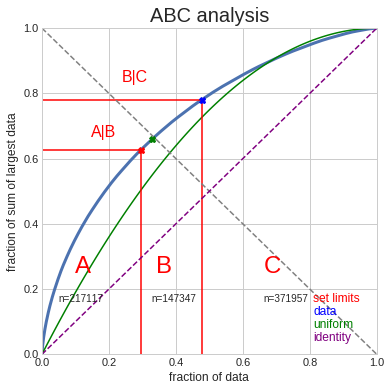

In [ ]:
#Draw the ABC Graph
abc = abc_analysis(df_temp['revenue'], True)

italicized text<h1>Seasonality and Trend<h1>

In [ ]:
ids = 0
d_cols = [i for i in df_sales_trainn.columns if 'd_' in i]
example = df_sales_trainn.loc[ids][d_cols].reset_index()
example.columns = ['d' , 'sales']
example = example.set_index('d').merge(df_calendarr.set_index('d')['date'], left_index=True, right_index=True)
example = example.set_index('date')

In [ ]:
example.plot(figsize=(15,5))

In [ ]:
example.index.inferred_freq

In [ ]:
result = seasonal_decompose(example, model='additive', period=365)
result.plot()
plt.show()

<h1>Checking if the data is stationary<h1>

To determine if our series is stationary or non-stationary, plotting the rolling mean and variance is a suitable statistic to use. If rolling statistics exhibit a distinct trend (upward or downward) in the mean and fluctuate in variance (increasing or decreasing amplitude) in the standard deviation, the series may not be stationary.

In [ ]:
fig, ax = plt.subplots(1,figsize=(12, 5))
ax.plot(example.index, example.sales, label='raw data')
# Window of 12 is choosen as we have 12-period seasonality
ax.plot(example.sales.rolling(window=12).mean(), label="rolling mean") 
ax.plot(example.sales.rolling(window=12).std(), label="rolling std (x10)")
ax.legend(bbox_to_anchor=(1.01,1.01))

As shown by the figure above, the series is non-stationary; both the mean and variance change. Using the Dickey-fuller test, this test will produce a result known as a "test-statistic", on the basis of which you can determine whether the time series is stationary or not with varying degrees of confidence.

<h1>Dickey-fuller Test<h1>

In [ ]:
def adfuller_test(data):
    print("Checking if the data is stationary")
    dftest = adfuller(data, autolag='AIC')
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values:")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(k,v,"not" if v<dftest[0] else "",100-int(k[:-1])))

In [ ]:
adfuller_test(example.sales)

<h1>Making series stationary<h1>

De-trending the series - To eliminate the trend in the series, we will build a de-trended column whose values are split by rolling variance and removed from the rolling mean.

In [ ]:
example['detrended_sales'] = (example['sales'] - example.sales.rolling(window=12).mean())/example.sales.rolling(window=12).std()
example

Determining whether or not our de-trended series is stationary by using rolling analysis and the Adfuller test. We will choose window of 12 as we have 12-period seasonality

In [ ]:
fig, ax = plt.subplots(1,figsize=(12, 5))
ax.plot(example.index, example.detrended_sales, label='de-trended data')
ax.plot(example.detrended_sales.rolling(window=12).mean(), label="rolling mean") 
ax.plot(example.detrended_sales.rolling(window=12).std(), label="rolling std (x10)")
ax.legend(bbox_to_anchor=(1.01,1.01))

In [ ]:
adfuller_test(example.detrended_sales.dropna())

It can be observed from the results of the two tests mentioned above, our detrended series is trend-free, but the plotting analysis graph still shows a seasonal component. 

If data is 12-month seasonal, subtracting the series with a 12-lag difference will result in a "flatter" series.

The variance/std has an increasing decreasing amplitude.

De-seasoning the series - This is accomplished by determining which states, seasonal or cyclic patterns can be removed by subtracting periodical values (this subtraction is performed on detrended series). 

In [ ]:
example['deseasonal_sales'] = example['detrended_sales'] - example['detrended_sales'].shift(12)
example

Analyzing our de-seasonal series using rolling analysis and the Adfuller test to determine whether it is stationary.

In [ ]:
fig, ax = plt.subplots(1,figsize=(12, 5))
ax.plot(example.index, example.deseasonal_sales, label="12 lag differenced de-trended data")
ax.plot(example.deseasonal_sales.rolling(window=12).mean(), label="rolling mean");
ax.plot(example.deseasonal_sales.rolling(window=12).std(), label="rolling std (x10)");
ax.legend(bbox_to_anchor=(1.01, 1.01))

In [ ]:
adfuller_test(example.deseasonal_sales.dropna())

Both of the above tests indicate that our de-seasonal dataset is free of trend and seasonality.

<h1>Autocorrelation plots <h1>

In [ ]:
fig, ax = plt.subplots(2, figsize=(15,9))
ax[0] = plot_acf(example.sales.dropna(), ax=ax[0])
ax[1] = plot_pacf(example.sales.dropna(), ax=ax[1])

The AR (Auto-Regression) term and MA (Moving Average) term in the ARMA model can be derived using the ACF and PACF plots, respectively. PACF works well for identifying AR parts. The PACF "shuts off" for an AR part after the model order. Theoretically, when anything "shuts off," the PACF is equal to 0 past that value.

ACF is the most effective tool for MA part identification. In the case of an MA part, the PACF does not shut off but instead weavers around 0 in some way. Additionally, the ACF plot shows an exponential decline rather than a sudden termination.

In [ ]:
fig, ax = plt.subplots(2, figsize=(15,9))
ax[0] = plot_acf(example.detrended_sales.dropna(), ax=ax[0])
ax[1] = plot_pacf(example.detrended_sales.dropna(), ax=ax[1])

We can set AR to 0 or 1 and MA to 1 or 2 based on our plots.

<h1>ARIMA Model - AutoRegressive Integrated MovingAverage model<h1>



In [ ]:
#Performing grid search to find the best parameters for ARIMA model 

p=d=q=range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]
aics = []
params = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        data = example['sales'].astype('int64').values
        model = sm.tsa.statespace.SARIMAX(data, order=param, seasonal_order=param_seasonal)
        result = model.fit()
        aics.append(result.aic)
        params.append((param, param_seasonal))
        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))

index = aics.index(min(aics))
print("Minimum values: " + str(params[index]) + str(aics[index]))

In [ ]:
#After determining the optimal parameter values, we will fit the model
data = example['sales'].astype('int64')
model = sm.tsa.statespace.SARIMAX(data, order=(0,1,1), seasonal_order=(0,0,0,12), 
                                  enforce_stationarity=False, enforce_invertibility=False)
result = model.fit()
print(result.summary())

In [ ]:
result.plot_diagnostics(figsize=(16,8))
plt.show()

<h1>Validating forecast<h1>

To get a better understanding of the data and the forecasts produced by ARIMA, printing the sales for the previous 200 days.

In [ ]:
pred = result.get_prediction(start='2016-01-01', dynamic=False)
pred_ci = pred.conf_int()

ax=example['sales'][-200:].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=0.7, figsize=(15,5))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()
plt.show()

<h1>Calculating RMSE<h1>

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = data['2016-01-01':]

In [ ]:
rmse = ((y_forecasted - y_truth)**2).mean()
print('The Mean Squared Error is {}'.format(np.sqrt(rmse), 2))

- The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data – how close the observed data points are to the model's predicted values. 
- As the value of RMSE is greater than 1, the model is not optimized very well.

<h1>LSTM<h1>

In [ ]:
timesteps=14
startDay=0

In [ ]:
df_sales_trainn.shape

In [ ]:
df_sample_submission.tail()

In [ ]:
df_sales_trainn.isnull()

In [ ]:
print(df_sales_trainn.info())

In [ ]:
df_sales_trainn = df_sales_trainn.T

In [ ]:
df_sales_trainn = df_sales_trainn[6:]
df_sales_trainn

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
df_sales_trainn = sc.fit_transform(df_sales_trainn)

In [ ]:
# Generating X_train and y_train
timesteps=14
X_train = []
y_train = []
for i in range(timesteps, 1913):
    X_train.append(df_sales_trainn[i-timesteps:i])
    y_train.append(df_sales_trainn[i][0:30490]) 


In [ ]:
X_train = np.array(X_train, dtype = 'float16')
y_train = np.array(y_train, dtype = 'float16')

In [ ]:
X_train.shape,y_train.shape

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units =64,input_shape = (np.array(X_train).shape[1], np.array(X_train).shape[2])))
model.add(tf.keras.layers.Dense(30490))

model.compile(
  loss='mean_squared_error',
  optimizer=tf.keras.optimizers.Adam(0.001)
)
model.summary()

In [ ]:
model.fit(X_train, y_train, epochs = 20, batch_size = 10)

In [ ]:
#Test Data
inputs= df_sales_trainn[-timesteps:]
inputs = sc.transform(inputs)
inputs

In [ ]:
X_test=[]
X_test.append(inputs[0:timesteps])
X_test = np.array(X_test)
predictions=model.predict(X_test)

In [ ]:
predictions

In [ ]:
print("hi")

2b & 2c

In [ ]:
#df_final.isnull().sum()
df_final.fillna(0,inplace=True)
df_final.isnull().sum()
dff_final = df_final.copy(deep=True)
print(dff_final.dtypes)

ana=dff_final.copy(deep=True)

In [ ]:
#CD = ['d' + str(i) for i in range(1, 366)]
#df_final = df_final[CD]
#print(CD)
#print(dff_final['d'].unique)

dff_final = dff_final.groupby(['item_id','dept_id','cat_id','d']).sum()



#print(dff_final.groupby(['item_id','dept_id','cat_id','d']).size())

dff_final.dtypes
#print(dff_final.head())



print(dff_final.head())

#a=dff_final.groupby(['item_id','dept_id','cat_id'])


#a['std'] = dffinal['value'].std(axis=1)

#a.head()

In [ ]:
dffinal =  pd.DataFrame(dff_final).reset_index()

#print(dffinal.head())


##to take days which has less sales so that can recommend or suggest improvements in business
n=dffinal.groupby(by=['d'],as_index=False)['sell_price'].sum()
less_sales=n.sort_values(by=['sell_price'],ascending=True)



##taking 20 of least performing days
len(less_sales) 

ls=less_sales.head(10)

lesssalesdays=list(ls['d'])

print(lesssalesdays) #['d_1', 'd_7', 'd_6', 'd_2', 'd_4', 'd_5', 'd_3', 'd_12', 'd_9', 'd_11']


##for day d1
d_1=dffinal[dffinal['d'] =='d_1']

#finding mean
d_1['mean']=d_1.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_1['std']=d_1.groupby(['dept_id'])['value'].transform('std')


#for day d7
d_7=dffinal[dffinal['d'] =='d_7']

##finding mean
d_7['mean']=d_7.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_7['std']=d_7.groupby(['dept_id'])['value'].transform('std')


#for day d6
d_6=dffinal[dffinal['d'] =='d_6']

##finding mean
d_6['mean']=d_6.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_6['std']=d_6.groupby(['dept_id'])['value'].transform('std')

#for day d2
d_2=dffinal[dffinal['d'] =='d_2']

##finding mean
d_2['mean']=d_2.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_2['std']=d_2.groupby(['dept_id'])['value'].transform('std')

#for day d4
d_4=dffinal[dffinal['d'] =='d_4']

##finding mean
d_4['mean']=d_4.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_4['std']=d_4.groupby(['dept_id'])['value'].transform('std')


#for day d5
d_5=dffinal[dffinal['d'] =='d_5']

##finding mean
d_5['mean']=d_5.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_5['std']=d_5.groupby(['dept_id'])['value'].transform('std')


#for day d3
d_3=dffinal[dffinal['d'] =='d_3']

##finding mean
d_3['mean']=d_3.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_3['std']=d_3.groupby(['dept_id'])['value'].transform('std')


#for day d12
d_12=dffinal[dffinal['d'] =='d_12']

##finding mean
d_12['mean']=d_12.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_12['std']=d_12.groupby(['dept_id'])['value'].transform('std')



#for day d9
d_9=dffinal[dffinal['d'] =='d_9']

##finding mean
d_9['mean']=d_9.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_9['std']=d_9.groupby(['dept_id'])['value'].transform('std')


#for day d11
d_11=dffinal[dffinal['d'] =='d_11']

##finding mean
d_11['mean']=d_11.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_11['std']=d_11.groupby(['dept_id'])['value'].transform('std')




##Finding turnover for each day for particular department
#T=s*p
d_1['sect']= d_1.groupby(['dept_id'])['value'].transform('sum')

d_1.groupby(['dept_id'])
d_1['t']=d_1['sect']*d_1['sell_price']
d_1['t%'] = (100*d_1['t']/d_1['t'].sum())

##To sort the values
d_1.sort_values(['t%'], ascending = False, inplace = True, ignore_index=True)
d_1['tcs%'] = d_1['t%'].cumsum()

# A, B, C on SKU Number
n_len1 = len(d_1)

na1, nb1 = int(0.05*n_len1), int(0.5*n_len1)
d_1['sid'] = pd.Series(range(1, len(d_1))).astype(int)
d_1['sk%'] = (100 * pd.Series(range(1, len(d_1))) / len(d_1))
d_1['ABC'] = pd.Series(range(len(d_1))).apply(lambda t: 'A' if t <= na1-1 else 'B' if t <= nb1-1 else 'C')

ta1, tb1 = d_1[d_1['sid']==na1]['t%'].max(), d_1[d_1['sid']==nb1]['t%'].max()




d_7['sect']= d_7.groupby(['dept_id'])['value'].transform('sum')

d_7.groupby(['dept_id'])
d_7['t']=d_7['sect']*d_7['sell_price']
d_7['t%'] = (100*d_7['t']/d_7['t'].sum())

##To sort the values
d_7.sort_values(['t%'], ascending = False, inplace = True, ignore_index=True)
d_7['tcs%'] = d_7['t%'].cumsum()

# A, B, C on SKU Number
n_len7 = len(d_7)

na7, nb7 = int(0.05*n_len7), int(0.5*n_len7)
d_7['sid'] = pd.Series(range(1, len(d_7))).astype(int)
d_7['sk%'] = (100 * pd.Series(range(1, len(d_7))) / len(d_7))
d_7['ABC'] = pd.Series(range(len(d_7))).apply(lambda t: 'A' if t <= na7-1 else 'B' if t <= nb7-1 else 'C')

ta7, tb7 = d_7[d_7['sid']==na7]['t%'].max(), d_7[d_7['sid']==nb7]['t%'].max()


d_6['sect']= d_6.groupby(['dept_id'])['value'].transform('sum')

d_6.groupby(['dept_id'])
d_6['t']=d_6['sect']*d_6['sell_price']
d_6['t%'] = (100*d_6['t']/d_6['t'].sum())

##To sort the values
d_6.sort_values(['t%'], ascending = False, inplace = True, ignore_index=True)
d_6['tcs%'] = d_6['t%'].cumsum()

# A, B, C on SKU Number
n_len6 = len(d_6)

na6, nb6 = int(0.05*n_len6), int(0.5*n_len6)
d_6['sid'] = pd.Series(range(1, len(d_6))).astype(int)
d_6['sk%'] = (100 * pd.Series(range(1, len(d_6))) / len(d_6))
d_6['ABC'] = pd.Series(range(len(d_6))).apply(lambda t: 'A' if t <= na6-1 else 'B' if t <= nb6-1 else 'C')

ta6, tb6 = d_6[d_6['sid']==na6]['t%'].max(), d_6[d_6['sid']==nb6]['t%'].max()

d_2['sect']= d_2.groupby(['dept_id'])['value'].transform('sum')

d_2.groupby(['dept_id'])
d_2['t']=d_2['sect']*d_2['sell_price']
d_2['t%'] = (100*d_2['t']/d_2['t'].sum())

##To sort the values
d_2.sort_values(['t%'], ascending = False, inplace = True, ignore_index=True)
d_2['tcs%'] = d_2['t%'].cumsum()

# A, B, C on SKU Number
n_len2 = len(d_2)

na2, nb2 = int(0.05*n_len2), int(0.5*n_len2)
d_2['sid'] = pd.Series(range(1, len(d_2))).astype(int)
d_2['sk%'] = (100 * pd.Series(range(1, len(d_2))) / len(d_2))
d_2['ABC'] = pd.Series(range(len(d_2))).apply(lambda t: 'A' if t <= na2-1 else 'B' if t <= nb2-1 else 'C')

ta2, tb2 = d_2[d_2['sid']==na2]['t%'].max(), d_2[d_2['sid']==nb2]['t%'].max()

d_4['sect']= d_4.groupby(['dept_id'])['value'].transform('sum')

d_4.groupby(['dept_id'])
d_4['t']=d_4['sect']*d_4['sell_price']
d_4['t%'] = (100*d_4['t']/d_4['t'].sum())

##To sort the values
d_4.sort_values(['t%'], ascending = False, inplace = True, ignore_index=True)
d_4['tcs%'] = d_4['t%'].cumsum()

# A, B, C on SKU Number
n_len4 = len(d_4)

na4, nb4 = int(0.05*n_len4), int(0.5*n_len4)
d_4['sid'] = pd.Series(range(1, len(d_4))).astype(int)
d_4['sk%'] = (100 * pd.Series(range(1, len(d_4))) / len(d_4))
d_4['ABC'] = pd.Series(range(len(d_4))).apply(lambda t: 'A' if t <= na4-1 else 'B' if t <= nb4-1 else 'C')

ta4, tb4 = d_4[d_4['sid']==na4]['t%'].max(), d_4[d_4['sid']==nb4]['t%'].max()

d_5['sect']= d_5.groupby(['dept_id'])['value'].transform('sum')

d_5.groupby(['dept_id'])
d_5['t']=d_5['sect']*d_5['sell_price']
d_5['t%'] = (100*d_5['t']/d_5['t'].sum())

##To sort the values
d_5.sort_values(['t%'], ascending = False, inplace = True, ignore_index=True)
d_5['tcs%'] = d_5['t%'].cumsum()

# A, B, C on SKU Number
n_len5 = len(d_5)

na5, nb5 = int(0.05*n_len5), int(0.5*n_len5)
d_5['sid'] = pd.Series(range(1, len(d_5))).astype(int)
d_5['sk%'] = (100 * pd.Series(range(1, len(d_5))) / len(d_5))
d_5['ABC'] = pd.Series(range(len(d_5))).apply(lambda t: 'A' if t <= na5-1 else 'B' if t <= nb5-1 else 'C')

ta5, tb5 = d_5[d_5['sid']==na5]['t%'].max(), d_5[d_5['sid']==nb5]['t%'].max()


d_3['sect']= d_3.groupby(['dept_id'])['value'].transform('sum')

d_3.groupby(['dept_id'])
d_3['t']=d_3['sect']*d_3['sell_price']
d_3['t%'] = (100*d_3['t']/d_3['t'].sum())

##To sort the values
d_3.sort_values(['t%'], ascending = False, inplace = True, ignore_index=True)
d_3['tcs%'] = d_3['t%'].cumsum()

# A, B, C on SKU Number
n_len3 = len(d_3)

na3, nb3 = int(0.05*n_len3), int(0.5*n_len3)
d_3['sid'] = pd.Series(range(1, len(d_3))).astype(int)
d_3['sk%'] = (100 * pd.Series(range(1, len(d_3))) / len(d_3))
d_3['ABC'] = pd.Series(range(len(d_3))).apply(lambda t: 'A' if t <= na3-1 else 'B' if t <= nb3-1 else 'C')

ta3, tb3 = d_3[d_3['sid']==na3]['t%'].max(), d_3[d_3['sid']==nb3]['t%'].max()

d_12['sect']= d_12.groupby(['dept_id'])['value'].transform('sum')

d_12.groupby(['dept_id'])
d_12['t']=d_12['sect']*d_12['sell_price']
d_12['t%'] = (100*d_12['t']/d_12['t'].sum())

##To sort the values
d_12.sort_values(['t%'], ascending = False, inplace = True, ignore_index=True)
d_12['tcs%'] = d_12['t%'].cumsum()

# A, B, C on SKU Number
n_len12 = len(d_12)

na12, nb12 = int(0.05*n_len12), int(0.5*n_len12)
d_12['sid'] = pd.Series(range(1, len(d_12))).astype(int)
d_12['sk%'] = (100 * pd.Series(range(1, len(d_12))) / len(d_12))
d_12['ABC'] = pd.Series(range(len(d_12))).apply(lambda t: 'A' if t <= na12-1 else 'B' if t <= nb12-1 else 'C')

ta12, tb12 = d_12[d_12['sid']==na12]['t%'].max(), d_12[d_12['sid']==nb12]['t%'].max()


d_9['sect']= d_9.groupby(['dept_id'])['value'].transform('sum')

d_9.groupby(['dept_id'])
d_9['t']=d_9['sect']*d_9['sell_price']
d_9['t%'] = (100*d_9['t']/d_9['t'].sum())

##To sort the values
d_9.sort_values(['t%'], ascending = False, inplace = True, ignore_index=True)
d_9['tcs%'] = d_9['t%'].cumsum()

# A, B, C on SKU Number
n_len9 = len(d_9)

na9, nb9 = int(0.05*n_len9), int(0.5*n_len9)
d_9['sid'] = pd.Series(range(1, len(d_9))).astype(int)
d_9['sk%'] = (100 * pd.Series(range(1, len(d_9))) / len(d_9))
d_9['ABC'] = pd.Series(range(len(d_9))).apply(lambda t: 'A' if t <= na9-1 else 'B' if t <= nb9-1 else 'C')

ta9, tb9 = d_9[d_9['sid']==na9]['t%'].max(), d_9[d_9['sid']==nb9]['t%'].max()


d_11['sect']= d_11.groupby(['dept_id'])['value'].transform('sum')

d_11.groupby(['dept_id'])
d_11['t']=d_11['sect']*d_11['sell_price']
d_11['t%'] = (100*d_11['t']/d_11['t'].sum())

##To sort the values
d_11.sort_values(['t%'], ascending = False, inplace = True, ignore_index=True)
d_11['tcs%'] = d_11['t%'].cumsum()

# A, B, C on SKU Number
n_len11 = len(d_11)

na11, nb11 = int(0.05*n_len11), int(0.5*n_len11)
d_11['sid'] = pd.Series(range(1, len(d_11))).astype(int)
d_11['sk%'] = (100 * pd.Series(range(1, len(d_11))) / len(d_11))
d_11['ABC'] = pd.Series(range(len(d_11))).apply(lambda t: 'A' if t <= na11-1 else 'B' if t <= nb11-1 else 'C')

ta11, tb11 = d_11[d_11['sid']==na11]['t%'].max(), d_11[d_11['sid']==nb11]['t%'].max()





print(d_1.head())




#c=b[b['dept_id']=='FOODS_1']

#print(c.head())

#dffinal.head(15)
#dffinal['mean'].unique

2b

In [ ]:
##co-efficient of variation for yearly data to check stability that is customer demand in the order of less sales to highest
d_1['cv']=d_1['std']/d_1['mean']


d_7['cv']=d_7['std']/d_7['mean']

d_6['cv']=d_6['std']/d_6['mean']

d_2['cv']=d_2['std']/d_2['mean']

d_4['cv']=d_4['std']/d_4['mean']

d_5['cv']=d_5['std']/d_5['mean']

d_3['cv']=d_3['std']/d_3['mean']

d_12['cv']=d_12['std']/d_12['mean']

d_9['cv']=d_9['std']/d_9['mean']

d_11['cv']=d_11['std']/d_11['mean']


d_14=dffinal[dffinal['d'] =='d_14']
##finding mean
d_14['mean']=d_14.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_14['std']=d_14.groupby(['dept_id'])['value'].transform('std')

d_14['cv']=d_14['std']/d_14['mean']

d_10=dffinal[dffinal['d'] =='d_10']
##finding mean
d_10['mean']=d_10.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_10['std']=d_10.groupby(['dept_id'])['value'].transform('std')

d_10['cv']=d_10['std']/d_10['mean']


d_13=dffinal[dffinal['d'] =='d_13']
##finding mean
d_13['mean']=d_13.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_13['std']=d_13.groupby(['dept_id'])['value'].transform('std')

d_13['cv']=d_13['std']/d_13['mean']


d_8=dffinal[dffinal['d'] =='d_8']
##finding mean
d_8['mean']=d_8.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_8['std']=d_8.groupby(['dept_id'])['value'].transform('std')

d_8['cv']=d_8['std']/d_8['mean']


d_17=dffinal[dffinal['d'] =='d_17']
##finding mean
d_17['mean']=d_17.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_17['std']=d_17.groupby(['dept_id'])['value'].transform('std')

d_17['cv']=d_17['std']/d_17['mean']


d_18=dffinal[dffinal['d'] =='d_18']
##finding mean
d_18['mean']=d_18.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_18['std']=d_18.groupby(['dept_id'])['value'].transform('std')

d_18['cv']=d_18['std']/d_18['mean']



d_16=dffinal[dffinal['d'] =='d_16']
##finding mean
d_16['mean']=d_16.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_16['std']=d_16.groupby(['dept_id'])['value'].transform('std')

d_16['cv']=d_16['std']/d_16['mean']



d_15=dffinal[dffinal['d'] =='d_15']
##finding mean
d_15['mean']=d_15.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_15['std']=d_15.groupby(['dept_id'])['value'].transform('std')

d_15['cv']=d_15['std']/d_15['mean']




d_21=dffinal[dffinal['d'] =='d_21']
##finding mean
d_21['mean']=d_21.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_21['std']=d_21.groupby(['dept_id'])['value'].transform('std')

d_21['cv']=d_21['std']/d_21['mean']



d_20=dffinal[dffinal['d'] =='d_20']
##finding mean
d_20['mean']=d_20.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_20['std']=d_20.groupby(['dept_id'])['value'].transform('std')

d_20['cv']=d_20['std']/d_20['mean']


d_19=dffinal[dffinal['d'] =='d_19']
##finding mean
d_19['mean']=d_19.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_19['std']=d_19.groupby(['dept_id'])['value'].transform('std')

d_19['cv']=d_19['std']/d_19['mean']



d_22=dffinal[dffinal['d'] =='d_22']
##finding mean
d_22['mean']=d_22.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_22['std']=d_22.groupby(['dept_id'])['value'].transform('std')

d_22['cv']=d_22['std']/d_22['mean']



d_23=dffinal[dffinal['d'] =='d_23']
##finding mean
d_23['mean']=d_23.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_23['std']=d_23.groupby(['dept_id'])['value'].transform('std')

d_23['cv']=d_23['std']/d_23['mean']


d_24=dffinal[dffinal['d'] =='d_24']
##finding mean
d_24['mean']=d_24.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_24['std']=d_24.groupby(['dept_id'])['value'].transform('std')

d_24['cv']=d_24['std']/d_24['mean']



d_25=dffinal[dffinal['d'] =='d_25']
##finding mean
d_25['mean']=d_25.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_25['std']=d_25.groupby(['dept_id'])['value'].transform('std')

d_25['cv']=d_25['std']/d_25['mean']



d_28=dffinal[dffinal['d'] =='d_28']
##finding mean
d_28['mean']=d_28.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_28['std']=d_28.groupby(['dept_id'])['value'].transform('std')

d_28['cv']=d_28['std']/d_28['mean']


d_27=dffinal[dffinal['d'] =='d_27']
##finding mean
d_27['mean']=d_27.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_27['std']=d_27.groupby(['dept_id'])['value'].transform('std')

d_27['cv']=d_27['std']/d_27['mean']



d_26=dffinal[dffinal['d'] =='d_26']
##finding mean
d_26['mean']=d_26.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_26['std']=d_26.groupby(['dept_id'])['value'].transform('std')

d_26['cv']=d_26['std']/d_26['mean']



d_30=dffinal[dffinal['d'] =='d_30']
##finding mean
d_30['mean']=d_14.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_30['std']=d_30.groupby(['dept_id'])['value'].transform('std')

d_30['cv']=d_30['std']/d_30['mean']


d_31=dffinal[dffinal['d'] =='d_31']

##finding mean
d_31['mean']=d_31.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_31['std']=d_31.groupby(['dept_id'])['value'].transform('std')


d_31['cv']=d_31['std']/d_31['mean']

d_32=dffinal[dffinal['d'] =='d_32']

##finding mean
d_32['mean']=d_32.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_32['std']=d_32.groupby(['dept_id'])['value'].transform('std')


d_32['cv']=d_32['std']/d_32['mean']



d_33=dffinal[dffinal['d'] =='d_33']


##finding mean
d_33['mean']=d_33.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_33['std']=d_33.groupby(['dept_id'])['value'].transform('std')


d_33['cv']=d_33['std']/d_33['mean']


d_34=dffinal[dffinal['d'] =='d_34']


##finding mean
d_34['mean']=d_34.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_34['std']=d_34.groupby(['dept_id'])['value'].transform('std')


d_34['cv']=d_34['std']/d_34['mean']


d_35=dffinal[dffinal['d'] =='d_35']



##finding mean
d_35['mean']=d_35.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_35['std']=d_35.groupby(['dept_id'])['value'].transform('std')


d_35['cv']=d_35['std']/d_35['mean']



d_36=dffinal[dffinal['d'] =='d_36']


##finding mean
d_36['mean']=d_36.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_36['std']=d_36.groupby(['dept_id'])['value'].transform('std')


d_36['cv']=d_36['std']/d_36['mean']




d_37=dffinal[dffinal['d'] =='d_37']


##finding mean
d_37['mean']=d_37.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_37['std']=d_37.groupby(['dept_id'])['value'].transform('std')


d_37['cv']=d_37['std']/d_37['mean']



d_38=dffinal[dffinal['d'] =='d_38']



##finding mean
d_38['mean']=d_38.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_38['std']=d_38.groupby(['dept_id'])['value'].transform('std')


d_38['cv']=d_38['std']/d_38['mean']



d_39=dffinal[dffinal['d'] =='d_39']


##finding mean
d_39['mean']=d_39.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_39['std']=d_39.groupby(['dept_id'])['value'].transform('std')


d_39['cv']=d_39['std']/d_39['mean']



d_40=dffinal[dffinal['d'] =='d_40']


##finding mean
d_40['mean']=d_40.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_40['std']=d_40.groupby(['dept_id'])['value'].transform('std')


d_40['cv']=d_40['std']/d_40['mean']


d_41=dffinal[dffinal['d'] =='d_41']


##finding mean
d_41['mean']=d_41.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_41['std']=d_41.groupby(['dept_id'])['value'].transform('std')


d_41['cv']=d_41['std']/d_41['mean']


d_42=dffinal[dffinal['d'] =='d_42']

##finding mean
d_42['mean']=d_42.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_42['std']=d_42.groupby(['dept_id'])['value'].transform('std')


d_42['cv']=d_42['std']/d_42['mean']



d_43=dffinal[dffinal['d'] =='d_43']

##finding mean
d_43['mean']=d_43.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_43['std']=d_43.groupby(['dept_id'])['value'].transform('std')


d_43['cv']=d_43['std']/d_43['mean']


d_44=dffinal[dffinal['d'] =='d_44']

##finding mean
d_44['mean']=d_44.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_44['std']=d_44.groupby(['dept_id'])['value'].transform('std')


d_44['cv']=d_44['std']/d_44['mean']



d_45=dffinal[dffinal['d'] =='d_45']


##finding mean
d_45['mean']=d_45.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_45['std']=d_45.groupby(['dept_id'])['value'].transform('std')


d_45['cv']=d_45['std']/d_45['mean']


d_46=dffinal[dffinal['d'] =='d_46']


##finding mean
d_46['mean']=d_46.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_46['std']=d_46.groupby(['dept_id'])['value'].transform('std')


d_46['cv']=d_46['std']/d_43['mean']



d_47=dffinal[dffinal['d'] =='d_47']


##finding mean
d_47['mean']=d_47.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_47['std']=d_47.groupby(['dept_id'])['value'].transform('std')


d_47['cv']=d_47['std']/d_47['mean']


d_48=dffinal[dffinal['d'] =='d_48']

##finding mean
d_48['mean']=d_48.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_48['std']=d_48.groupby(['dept_id'])['value'].transform('std')


d_48['cv']=d_48['std']/d_48['mean']



d_49=dffinal[dffinal['d'] =='d_49']


##finding mean
d_49['mean']=d_49.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_49['std']=d_49.groupby(['dept_id'])['value'].transform('std')


d_49['cv']=d_49['std']/d_49['mean']


d_50=dffinal[dffinal['d'] =='d_50']


##finding mean
d_50['mean']=d_50.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_50['std']=d_50.groupby(['dept_id'])['value'].transform('std')


d_50['cv']=d_50['std']/d_50['mean']


d_51=dffinal[dffinal['d'] =='d_51']


##finding mean
d_51['mean']=d_51.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_51['std']=d_51.groupby(['dept_id'])['value'].transform('std')


d_51['cv']=d_51['std']/d_51['mean']


d_52=dffinal[dffinal['d'] =='d_52']
##finding mean
d_52['mean']=d_52.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_52['std']=d_52.groupby(['dept_id'])['value'].transform('std')


d_52['cv']=d_52['std']/d_52['mean']


d_53=dffinal[dffinal['d'] =='d_53']


##finding mean
d_53['mean']=d_53.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_53['std']=d_53.groupby(['dept_id'])['value'].transform('std')


d_53['cv']=d_53['std']/d_53['mean']


d_54=dffinal[dffinal['d'] =='d_54']


##finding mean
d_54['mean']=d_54.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_54['std']=d_54.groupby(['dept_id'])['value'].transform('std')


d_54['cv']=d_54['std']/d_54['mean']



d_55=dffinal[dffinal['d'] =='d_55']


##finding mean
d_55['mean']=d_55.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_55['std']=d_55.groupby(['dept_id'])['value'].transform('std')


d_55['cv']=d_55['std']/d_55['mean']


d_56=dffinal[dffinal['d'] =='d_56']


##finding mean
d_56['mean']=d_56.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_56['std']=d_56.groupby(['dept_id'])['value'].transform('std')


d_56['cv']=d_56['std']/d_56['mean']



d_57=dffinal[dffinal['d'] =='d_57']

##finding mean
d_57['mean']=d_57.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_57['std']=d_57.groupby(['dept_id'])['value'].transform('std')


d_57['cv']=d_57['std']/d_57['mean']



d_58=dffinal[dffinal['d'] =='d_58']


##finding mean
d_58['mean']=d_58.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_58['std']=d_58.groupby(['dept_id'])['value'].transform('std')


d_58['cv']=d_58['std']/d_58['mean']



d_59=dffinal[dffinal['d'] =='d_59']



##finding mean
d_59['mean']=d_59.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_59['std']=d_59.groupby(['dept_id'])['value'].transform('std')


d_59['cv']=d_59['std']/d_59['mean']



d_60=dffinal[dffinal['d'] =='d_60']


##finding mean
d_60['mean']=d_60.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_60['std']=d_60.groupby(['dept_id'])['value'].transform('std')


d_60['cv']=d_60['std']/d_60['mean']




d_61=dffinal[dffinal['d'] =='d_61']


##finding mean
d_61['mean']=d_61.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_61['std']=d_61.groupby(['dept_id'])['value'].transform('std')


d_61['cv']=d_61['std']/d_61['mean']



d_62=dffinal[dffinal['d'] =='d_62']


##finding mean
d_62['mean']=d_62.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_62['std']=d_62.groupby(['dept_id'])['value'].transform('std')


d_62['cv']=d_62['std']/d_62['mean']


d_63=dffinal[dffinal['d'] =='d_63']


##finding mean
d_63['mean']=d_63.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_63['std']=d_63.groupby(['dept_id'])['value'].transform('std')


d_63['cv']=d_63['std']/d_63['mean']



d_64=dffinal[dffinal['d'] =='d_64']


##finding mean
d_64['mean']=d_64.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_64['std']=d_64.groupby(['dept_id'])['value'].transform('std')


d_64['cv']=d_64['std']/d_64['mean']


d_65=dffinal[dffinal['d'] =='d_65']

##finding mean
d_65['mean']=d_65.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_65['std']=d_65.groupby(['dept_id'])['value'].transform('std')


d_65['cv']=d_65['std']/d_65['mean']


d_66=dffinal[dffinal['d'] =='d_66']

##finding mean
d_66['mean']=d_66.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_66['std']=d_66.groupby(['dept_id'])['value'].transform('std')


d_66['cv']=d_66['std']/d_66['mean']



d_67=dffinal[dffinal['d'] =='d_67']


##finding mean
d_67['mean']=d_67.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_67['std']=d_67.groupby(['dept_id'])['value'].transform('std')


d_67['cv']=d_67['std']/d_67['mean']



d_68=dffinal[dffinal['d'] =='d_68']


##finding mean
d_68['mean']=d_68.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_68['std']=d_68.groupby(['dept_id'])['value'].transform('std')


d_68['cv']=d_68['std']/d_68['mean']



d_69=dffinal[dffinal['d'] =='d_69']

##finding mean
d_69['mean']=d_69.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_69['std']=d_69.groupby(['dept_id'])['value'].transform('std')


d_69['cv']=d_69['std']/d_69['mean']



d_70=dffinal[dffinal['d'] =='d_70']

##finding mean
d_70['mean']=d_70.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_70['std']=d_70.groupby(['dept_id'])['value'].transform('std')


d_70['cv']=d_70['std']/d_70['mean']


d_71=dffinal[dffinal['d'] =='d_71']

##finding mean
d_71['mean']=d_71.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_71['std']=d_71.groupby(['dept_id'])['value'].transform('std')


d_71['cv']=d_71['std']/d_71['mean']



d_72=dffinal[dffinal['d'] =='d_72']


##finding mean
d_72['mean']=d_72.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_72['std']=d_72.groupby(['dept_id'])['value'].transform('std')


d_72['cv']=d_72['std']/d_72['mean']


d_73=dffinal[dffinal['d'] =='d_73']


##finding mean
d_73['mean']=d_73.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_73['std']=d_73.groupby(['dept_id'])['value'].transform('std')


d_73['cv']=d_73['std']/d_73['mean']



d_74=dffinal[dffinal['d'] =='d_74']


##finding mean
d_74['mean']=d_74.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_74['std']=d_74.groupby(['dept_id'])['value'].transform('std')


d_74['cv']=d_74['std']/d_74['mean']



d_75=dffinal[dffinal['d'] =='d_75']

##finding mean
d_75['mean']=d_75.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_75['std']=d_75.groupby(['dept_id'])['value'].transform('std')


d_75['cv']=d_75['std']/d_75['mean']



d_76=dffinal[dffinal['d'] =='d_76']

##finding mean
d_76['mean']=d_76.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_76['std']=d_76.groupby(['dept_id'])['value'].transform('std')


d_76['cv']=d_76['std']/d_76['mean']



d_77=dffinal[dffinal['d'] =='d_77']


##finding mean
d_77['mean']=d_77.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_77['std']=d_77.groupby(['dept_id'])['value'].transform('std')


d_77['cv']=d_77['std']/d_77['mean']



d_78=dffinal[dffinal['d'] =='d_78']


##finding mean
d_78['mean']=d_78.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_78['std']=d_78.groupby(['dept_id'])['value'].transform('std')


d_78['cv']=d_78['std']/d_78['mean']



d_79=dffinal[dffinal['d'] =='d_79']

##finding mean
d_79['mean']=d_79.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_79['std']=d_79.groupby(['dept_id'])['value'].transform('std')


d_79['cv']=d_79['std']/d_79['mean']


d_80=dffinal[dffinal['d'] =='d_80']

##finding mean
d_80['mean']=d_80.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_80['std']=d_80.groupby(['dept_id'])['value'].transform('std')


d_80['cv']=d_80['std']/d_80['mean']


d_81=dffinal[dffinal['d'] =='d_81']


##finding mean
d_81['mean']=d_81.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_81['std']=d_81.groupby(['dept_id'])['value'].transform('std')


d_81['cv']=d_81['std']/d_81['mean']


d_82=dffinal[dffinal['d'] =='d_82']


##finding mean
d_82['mean']=d_82.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_82['std']=d_82.groupby(['dept_id'])['value'].transform('std')


d_82['cv']=d_82['std']/d_82['mean']


d_83=dffinal[dffinal['d'] =='d_83']


##finding mean
d_83['mean']=d_83.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_83['std']=d_83.groupby(['dept_id'])['value'].transform('std')


d_83['cv']=d_83['std']/d_83['mean']


d_84=dffinal[dffinal['d'] =='d_84']


##finding mean
d_84['mean']=d_84.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_84['std']=d_84.groupby(['dept_id'])['value'].transform('std')


d_84['cv']=d_84['std']/d_84['mean']


d_85=dffinal[dffinal['d'] =='d_85']

##finding mean
d_85['mean']=d_85.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_85['std']=d_85.groupby(['dept_id'])['value'].transform('std')


d_85['cv']=d_85['std']/d_85['mean']


d_86=dffinal[dffinal['d'] =='d_86']


##finding mean
d_86['mean']=d_86.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_86['std']=d_86.groupby(['dept_id'])['value'].transform('std')


d_86['cv']=d_86['std']/d_86['mean']


d_87=dffinal[dffinal['d'] =='d_87']

##finding mean
d_87['mean']=d_87.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_87['std']=d_87.groupby(['dept_id'])['value'].transform('std')


d_87['cv']=d_87['std']/d_87['mean']


d_88=dffinal[dffinal['d'] =='d_88']


##finding mean
d_88['mean']=d_88.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_88['std']=d_88.groupby(['dept_id'])['value'].transform('std')


d_88['cv']=d_88['std']/d_88['mean']


d_89=dffinal[dffinal['d'] =='d_89']

##finding mean
d_89['mean']=d_89.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_89['std']=d_89.groupby(['dept_id'])['value'].transform('std')


d_89['cv']=d_89['std']/d_89['mean']



d_90=dffinal[dffinal['d'] =='d_90']

##finding mean
d_90['mean']=d_90.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_90['std']=d_90.groupby(['dept_id'])['value'].transform('std')


d_90['cv']=d_90['std']/d_90['mean']


d_91=dffinal[dffinal['d'] =='d_91']

##finding mean
d_91['mean']=d_91.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_91['std']=d_91.groupby(['dept_id'])['value'].transform('std')


d_91['cv']=d_91['std']/d_91['mean']


d_92=dffinal[dffinal['d'] =='d_92']


##finding mean
d_92['mean']=d_92.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_92['std']=d_92.groupby(['dept_id'])['value'].transform('std')


d_92['cv']=d_92['std']/d_92['mean']


d_93=dffinal[dffinal['d'] =='d_93']


##finding mean
d_93['mean']=d_93.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_93['std']=d_93.groupby(['dept_id'])['value'].transform('std')


d_93['cv']=d_93['std']/d_93['mean']


d_94=dffinal[dffinal['d'] =='d_94']


##finding mean
d_94['mean']=d_94.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_94['std']=d_94.groupby(['dept_id'])['value'].transform('std')


d_94['cv']=d_94['std']/d_94['mean']



d_95=dffinal[dffinal['d'] =='d_95']

##finding mean
d_95['mean']=d_95.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_95['std']=d_95.groupby(['dept_id'])['value'].transform('std')


d_95['cv']=d_95['std']/d_95['mean']


d_96=dffinal[dffinal['d'] =='d_96']


##finding mean
d_96['mean']=d_96.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_96['std']=d_96.groupby(['dept_id'])['value'].transform('std')


d_96['cv']=d_96['std']/d_96['mean']


d_97=dffinal[dffinal['d'] =='d_97']


##finding mean
d_97['mean']=d_97.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_97['std']=d_97.groupby(['dept_id'])['value'].transform('std')


d_97['cv']=d_97['std']/d_97['mean']



d_98=dffinal[dffinal['d'] =='d_98']


##finding mean
d_98['mean']=d_98.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_98['std']=d_98.groupby(['dept_id'])['value'].transform('std')


d_98['cv']=d_98['std']/d_98['mean']



d_99=dffinal[dffinal['d'] =='d_99']

##finding mean
d_99['mean']=d_99.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_99['std']=d_99.groupby(['dept_id'])['value'].transform('std')


d_99['cv']=d_99['std']/d_99['mean']


d_100=dffinal[dffinal['d'] =='d_100']

##finding mean
d_100['mean']=d_100.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_100['std']=d_100.groupby(['dept_id'])['value'].transform('std')


d_100['cv']=d_100['std']/d_100['mean']

d_101=dffinal[dffinal['d'] =='d_101']

##finding mean
d_101['mean']=d_101.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_101['std']=d_101.groupby(['dept_id'])['value'].transform('std')


d_101['cv']=d_101['std']/d_101['mean']

d_102=dffinal[dffinal['d'] =='d_102']


##finding mean
d_102['mean']=d_102.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_102['std']=d_102.groupby(['dept_id'])['value'].transform('std')


d_102['cv']=d_102['std']/d_102['mean']


d_103=dffinal[dffinal['d'] =='d_103']


##finding mean
d_103['mean']=d_103.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_103['std']=d_103.groupby(['dept_id'])['value'].transform('std')


d_103['cv']=d_103['std']/d_100['mean']


d_104=dffinal[dffinal['d'] =='d_104']


##finding mean
d_104['mean']=d_104.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_104['std']=d_104.groupby(['dept_id'])['value'].transform('std')


d_104['cv']=d_104['std']/d_104['mean']


d_105=dffinal[dffinal['d'] =='d_105']


##finding mean
d_105['mean']=d_105.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_105['std']=d_105.groupby(['dept_id'])['value'].transform('std')


d_105['cv']=d_105['std']/d_105['mean']


d_106=dffinal[dffinal['d'] =='d_106']


##finding mean
d_106['mean']=d_106.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_106['std']=d_106.groupby(['dept_id'])['value'].transform('std')


d_106['cv']=d_106['std']/d_100['mean']


d_107=dffinal[dffinal['d'] =='d_107']


##finding mean
d_107['mean']=d_107.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_107['std']=d_107.groupby(['dept_id'])['value'].transform('std')


d_107['cv']=d_107['std']/d_107['mean']


d_108=dffinal[dffinal['d'] =='d_108']


##finding mean
d_108['mean']=d_108.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_108['std']=d_108.groupby(['dept_id'])['value'].transform('std')


d_108['cv']=d_108['std']/d_108['mean']


d_109=dffinal[dffinal['d'] =='d_109']


##finding mean
d_109['mean']=d_109.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_109['std']=d_109.groupby(['dept_id'])['value'].transform('std')


d_109['cv']=d_109['std']/d_109['mean']


d_110=dffinal[dffinal['d'] =='d_110']


##finding mean
d_110['mean']=d_110.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_110['std']=d_110.groupby(['dept_id'])['value'].transform('std')


d_110['cv']=d_110['std']/d_110['mean']

d_111=dffinal[dffinal['d'] =='d_111']

##finding mean
d_111['mean']=d_111.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_111['std']=d_111.groupby(['dept_id'])['value'].transform('std')


d_111['cv']=d_111['std']/d_111['mean']


d_112=dffinal[dffinal['d'] =='d_112']


##finding mean
d_112['mean']=d_112.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_112['std']=d_112.groupby(['dept_id'])['value'].transform('std')


d_112['cv']=d_112['std']/d_112['mean']


d_113=dffinal[dffinal['d'] =='d_113']

##finding mean
d_113['mean']=d_113.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_113['std']=d_113.groupby(['dept_id'])['value'].transform('std')


d_113['cv']=d_113['std']/d_113['mean']


d_114=dffinal[dffinal['d'] =='d_114']


##finding mean
d_114['mean']=d_114.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_114['std']=d_114.groupby(['dept_id'])['value'].transform('std')


d_114['cv']=d_114['std']/d_114['mean']


d_115=dffinal[dffinal['d'] =='d_115']


##finding mean
d_115['mean']=d_115.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_115['std']=d_115.groupby(['dept_id'])['value'].transform('std')


d_115['cv']=d_115['std']/d_115['mean']

d_116=dffinal[dffinal['d'] =='d_116']


##finding mean
d_116['mean']=d_116.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_116['std']=d_116.groupby(['dept_id'])['value'].transform('std')


d_116['cv']=d_116['std']/d_116['mean']


d_117=dffinal[dffinal['d'] =='d_117']

##finding mean
d_117['mean']=d_117.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_117['std']=d_117.groupby(['dept_id'])['value'].transform('std')


d_117['cv']=d_117['std']/d_117['mean']


d_118=dffinal[dffinal['d'] =='d_118']


##finding mean
d_118['mean']=d_118.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_118['std']=d_118.groupby(['dept_id'])['value'].transform('std')


d_118['cv']=d_118['std']/d_118['mean']


d_119=dffinal[dffinal['d'] =='d_119']



##finding mean
d_119['mean']=d_119.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_119['std']=d_119.groupby(['dept_id'])['value'].transform('std')


d_119['cv']=d_119['std']/d_119['mean']


d_120=dffinal[dffinal['d'] =='d_120']


##finding mean
d_120['mean']=d_120.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_120['std']=d_120.groupby(['dept_id'])['value'].transform('std')


d_120['cv']=d_120['std']/d_120['mean']


d_121=dffinal[dffinal['d'] =='d_121']

##finding mean
d_121['mean']=d_121.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_121['std']=d_121.groupby(['dept_id'])['value'].transform('std')


d_121['cv']=d_121['std']/d_121['mean']


d_122=dffinal[dffinal['d'] =='d_122']

##finding mean
d_122['mean']=d_122.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_122['std']=d_122.groupby(['dept_id'])['value'].transform('std')


d_122['cv']=d_122['std']/d_122['mean']

d_123=dffinal[dffinal['d'] =='d_123']

##finding mean
d_123['mean']=d_123.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_123['std']=d_123.groupby(['dept_id'])['value'].transform('std')


d_123['cv']=d_123['std']/d_123['mean']


d_124=dffinal[dffinal['d'] =='d_124']


##finding mean
d_124['mean']=d_124.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_124['std']=d_124.groupby(['dept_id'])['value'].transform('std')


d_124['cv']=d_124['std']/d_124['mean']


d_125=dffinal[dffinal['d'] =='d_125']


##finding mean
d_125['mean']=d_125.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_125['std']=d_125.groupby(['dept_id'])['value'].transform('std')


d_125['cv']=d_125['std']/d_125['mean']


d_126=dffinal[dffinal['d'] =='d_126']


##finding mean
d_126['mean']=d_126.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_126['std']=d_126.groupby(['dept_id'])['value'].transform('std')


d_126['cv']=d_126['std']/d_126['mean']


d_127=dffinal[dffinal['d'] =='d_127']


##finding mean
d_127['mean']=d_127.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_127['std']=d_127.groupby(['dept_id'])['value'].transform('std')


d_127['cv']=d_127['std']/d_127['mean']


d_128=dffinal[dffinal['d'] =='d_128']


##finding mean
d_128['mean']=d_128.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_128['std']=d_128.groupby(['dept_id'])['value'].transform('std')


d_128['cv']=d_128['std']/d_121['mean']


d_129=dffinal[dffinal['d'] =='d_129']


##finding mean
d_129['mean']=d_129.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_129['std']=d_129.groupby(['dept_id'])['value'].transform('std')


d_129['cv']=d_129['std']/d_129['mean']


d_130=dffinal[dffinal['d'] =='d_130']


##finding mean
d_130['mean']=d_130.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_130['std']=d_130.groupby(['dept_id'])['value'].transform('std')


d_130['cv']=d_130['std']/d_130['mean']


d_131=dffinal[dffinal['d'] =='d_131']


##finding mean
d_131['mean']=d_131.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_131['std']=d_131.groupby(['dept_id'])['value'].transform('std')


d_131['cv']=d_131['std']/d_131['mean']


d_132=dffinal[dffinal['d'] =='d_132']


##finding mean
d_132['mean']=d_132.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_132['std']=d_132.groupby(['dept_id'])['value'].transform('std')


d_132['cv']=d_132['std']/d_132['mean']

d_133=dffinal[dffinal['d'] =='d_133']

##finding mean
d_133['mean']=d_133.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_133['std']=d_133.groupby(['dept_id'])['value'].transform('std')


d_133['cv']=d_133['std']/d_133['mean']


d_134=dffinal[dffinal['d'] =='d_134']


##finding mean
d_134['mean']=d_134.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_134['std']=d_134.groupby(['dept_id'])['value'].transform('std')


d_134['cv']=d_134['std']/d_134['mean']


d_135=dffinal[dffinal['d'] =='d_135']

##finding mean
d_135['mean']=d_135.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_135['std']=d_135.groupby(['dept_id'])['value'].transform('std')


d_135['cv']=d_135['std']/d_135['mean']


d_136=dffinal[dffinal['d'] =='d_136']


##finding mean
d_136['mean']=d_136.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_136['std']=d_136.groupby(['dept_id'])['value'].transform('std')


d_136['cv']=d_136['std']/d_136['mean']


d_137=dffinal[dffinal['d'] =='d_137']


##finding mean
d_137['mean']=d_137.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_137['std']=d_137.groupby(['dept_id'])['value'].transform('std')


d_137['cv']=d_137['std']/d_137['mean']


d_138=dffinal[dffinal['d'] =='d_138']



##finding mean
d_138['mean']=d_138.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_138['std']=d_138.groupby(['dept_id'])['value'].transform('std')


d_138['cv']=d_138['std']/d_138['mean']


d_139=dffinal[dffinal['d'] =='d_139']


##finding mean
d_139['mean']=d_139.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_139['std']=d_139.groupby(['dept_id'])['value'].transform('std')


d_139['cv']=d_139['std']/d_139['mean']


d_140=dffinal[dffinal['d'] =='d_140']


##finding mean
d_140['mean']=d_140.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_140['std']=d_140.groupby(['dept_id'])['value'].transform('std')


d_140['cv']=d_140['std']/d_140['mean']


d_141=dffinal[dffinal['d'] =='d_141']


##finding mean
d_141['mean']=d_141.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_141['std']=d_141.groupby(['dept_id'])['value'].transform('std')


d_141['cv']=d_141['std']/d_141['mean']




d_142=dffinal[dffinal['d'] =='d_142']


##finding mean
d_142['mean']=d_142.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_142['std']=d_142.groupby(['dept_id'])['value'].transform('std')


d_142['cv']=d_142['std']/d_141['mean']


d_143=dffinal[dffinal['d'] =='d_143']

##finding mean
d_143['mean']=d_143.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_143['std']=d_143.groupby(['dept_id'])['value'].transform('std')


d_143['cv']=d_143['std']/d_143['mean']


d_144=dffinal[dffinal['d'] =='d_144']


##finding mean
d_144['mean']=d_144.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_144['std']=d_144.groupby(['dept_id'])['value'].transform('std')


d_144['cv']=d_144['std']/d_144['mean']



d_145=dffinal[dffinal['d'] =='d_145']

##finding mean
d_145['mean']=d_145.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_145['std']=d_145.groupby(['dept_id'])['value'].transform('std')


d_145['cv']=d_145['std']/d_145['mean']


d_146=dffinal[dffinal['d'] =='d_146']


##finding mean
d_146['mean']=d_146.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_146['std']=d_146.groupby(['dept_id'])['value'].transform('std')


d_146['cv']=d_146['std']/d_146['mean']


d_147=dffinal[dffinal['d'] =='d_147']


##finding mean
d_147['mean']=d_147.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_147['std']=d_147.groupby(['dept_id'])['value'].transform('std')


d_147['cv']=d_147['std']/d_147['mean']


d_148=dffinal[dffinal['d'] =='d_148']


##finding mean
d_148['mean']=d_148.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_148['std']=d_148.groupby(['dept_id'])['value'].transform('std')


d_148['cv']=d_148['std']/d_148['mean']


d_149=dffinal[dffinal['d'] =='d_149']



##finding mean
d_149['mean']=d_149.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_149['std']=d_149.groupby(['dept_id'])['value'].transform('std')


d_149['cv']=d_149['std']/d_149['mean']


d_150=dffinal[dffinal['d'] =='d_150']


##finding mean
d_150['mean']=d_150.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_150['std']=d_150.groupby(['dept_id'])['value'].transform('std')


d_150['cv']=d_150['std']/d_150['mean']


d_151=dffinal[dffinal['d'] =='d_151']

##finding mean
d_151['mean']=d_151.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_151['std']=d_151.groupby(['dept_id'])['value'].transform('std')


d_151['cv']=d_151['std']/d_151['mean']


d_152=dffinal[dffinal['d'] =='d_152']

##finding mean
d_152['mean']=d_152.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_152['std']=d_152.groupby(['dept_id'])['value'].transform('std')


d_152['cv']=d_152['std']/d_152['mean']


d_153=dffinal[dffinal['d'] =='d_153']


##finding mean
d_153['mean']=d_153.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_153['std']=d_153.groupby(['dept_id'])['value'].transform('std')


d_153['cv']=d_153['std']/d_153['mean']


d_154=dffinal[dffinal['d'] =='d_154']



##finding mean
d_154['mean']=d_154.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_154['std']=d_154.groupby(['dept_id'])['value'].transform('std')


d_154['cv']=d_154['std']/d_154['mean']


d_155=dffinal[dffinal['d'] =='d_155']


##finding mean
d_155['mean']=d_155.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_155['std']=d_155.groupby(['dept_id'])['value'].transform('std')


d_155['cv']=d_155['std']/d_155['mean']


d_156=dffinal[dffinal['d'] =='d_156']



##finding mean
d_156['mean']=d_156.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_156['std']=d_156.groupby(['dept_id'])['value'].transform('std')


d_156['cv']=d_156['std']/d_156['mean']


d_157=dffinal[dffinal['d'] =='d_157']



##finding mean
d_157['mean']=d_157.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_157['std']=d_157.groupby(['dept_id'])['value'].transform('std')


d_157['cv']=d_157['std']/d_157['mean']


d_158=dffinal[dffinal['d'] =='d_158']



##finding mean
d_158['mean']=d_158.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_158['std']=d_158.groupby(['dept_id'])['value'].transform('std')


d_158['cv']=d_158['std']/d_158['mean']


d_159=dffinal[dffinal['d'] =='d_159']


##finding mean
d_159['mean']=d_159.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_159['std']=d_159.groupby(['dept_id'])['value'].transform('std')


d_159['cv']=d_159['std']/d_159['mean']


d_160=dffinal[dffinal['d'] =='d_160']


##finding mean
d_160['mean']=d_160.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_160['std']=d_160.groupby(['dept_id'])['value'].transform('std')


d_160['cv']=d_160['std']/d_160['mean']

d_161=dffinal[dffinal['d'] =='d_161']


##finding mean
d_161['mean']=d_161.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_161['std']=d_161.groupby(['dept_id'])['value'].transform('std')


d_161['cv']=d_161['std']/d_161['mean']


d_162=dffinal[dffinal['d'] =='d_162']


##finding mean
d_162['mean']=d_162.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_162['std']=d_162.groupby(['dept_id'])['value'].transform('std')


d_162['cv']=d_162['std']/d_162['mean']


d_163=dffinal[dffinal['d'] =='d_163']


##finding mean
d_163['mean']=d_163.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_163['std']=d_163.groupby(['dept_id'])['value'].transform('std')


d_163['cv']=d_163['std']/d_163['mean']


d_164=dffinal[dffinal['d'] =='d_164']


##finding mean
d_164['mean']=d_164.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_164['std']=d_164.groupby(['dept_id'])['value'].transform('std')


d_164['cv']=d_164['std']/d_164['mean']

d_165=dffinal[dffinal['d'] =='d_165']


##finding mean
d_165['mean']=d_165.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_165['std']=d_165.groupby(['dept_id'])['value'].transform('std')


d_165['cv']=d_165['std']/d_165['mean']


d_166=dffinal[dffinal['d'] =='d_166']



##finding mean
d_166['mean']=d_166.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_166['std']=d_166.groupby(['dept_id'])['value'].transform('std')


d_166['cv']=d_166['std']/d_166['mean']


d_167=dffinal[dffinal['d'] =='d_167']

##finding mean
d_167['mean']=d_167.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_167['std']=d_167.groupby(['dept_id'])['value'].transform('std')


d_167['cv']=d_167['std']/d_167['mean']


d_168=dffinal[dffinal['d'] =='d_168']


##finding mean
d_168['mean']=d_168.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_168['std']=d_168.groupby(['dept_id'])['value'].transform('std')


d_168['cv']=d_168['std']/d_168['mean']


d_169=dffinal[dffinal['d'] =='d_169']



##finding mean
d_169['mean']=d_169.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_169['std']=d_169.groupby(['dept_id'])['value'].transform('std')


d_169['cv']=d_169['std']/d_169['mean']

d_170=dffinal[dffinal['d'] =='d_170']


##finding mean
d_170['mean']=d_170.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_170['std']=d_170.groupby(['dept_id'])['value'].transform('std')


d_170['cv']=d_170['std']/d_170['mean']

d_171=dffinal[dffinal['d'] =='d_171']


##finding mean
d_171['mean']=d_171.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_171['std']=d_171.groupby(['dept_id'])['value'].transform('std')


d_171['cv']=d_171['std']/d_171['mean']


d_172=dffinal[dffinal['d'] =='d_172']


##finding mean
d_172['mean']=d_172.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_172['std']=d_172.groupby(['dept_id'])['value'].transform('std')


d_172['cv']=d_172['std']/d_172['mean']


d_173=dffinal[dffinal['d'] =='d_173']



##finding mean
d_173['mean']=d_173.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_173['std']=d_173.groupby(['dept_id'])['value'].transform('std')


d_173['cv']=d_173['std']/d_173['mean']

d_174=dffinal[dffinal['d'] =='d_174']


##finding mean
d_174['mean']=d_174.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_174['std']=d_174.groupby(['dept_id'])['value'].transform('std')


d_174['cv']=d_174['std']/d_174['mean']

d_175=dffinal[dffinal['d'] =='d_175']


##finding mean
d_175['mean']=d_175.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_175['std']=d_175.groupby(['dept_id'])['value'].transform('std')


d_175['cv']=d_175['std']/d_175['mean']

d_176=dffinal[dffinal['d'] =='d_176']


##finding mean
d_176['mean']=d_176.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_176['std']=d_176.groupby(['dept_id'])['value'].transform('std')


d_176['cv']=d_176['std']/d_176['mean']

d_177=dffinal[dffinal['d'] =='d_177']


##finding mean
d_177['mean']=d_177.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_177['std']=d_177.groupby(['dept_id'])['value'].transform('std')


d_177['cv']=d_177['std']/d_177['mean']

d_178=dffinal[dffinal['d'] =='d_178']


##finding mean
d_178['mean']=d_178.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_178['std']=d_178.groupby(['dept_id'])['value'].transform('std')


d_178['cv']=d_178['std']/d_178['mean']

d_179=dffinal[dffinal['d'] =='d_179']


##finding mean
d_179['mean']=d_179.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_179['std']=d_179.groupby(['dept_id'])['value'].transform('std')


d_179['cv']=d_179['std']/d_179['mean']

d_180=dffinal[dffinal['d'] =='d_180']

##finding mean
d_180['mean']=d_180.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_180['std']=d_180.groupby(['dept_id'])['value'].transform('std')


d_180['cv']=d_180['std']/d_180['mean']

d_181=dffinal[dffinal['d'] =='d_181']

##finding mean
d_181['mean']=d_181.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_181['std']=d_181.groupby(['dept_id'])['value'].transform('std')


d_181['cv']=d_181['std']/d_181['mean']

d_182=dffinal[dffinal['d'] =='d_182']


##finding mean
d_182['mean']=d_182.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_182['std']=d_182.groupby(['dept_id'])['value'].transform('std')


d_182['cv']=d_182['std']/d_182['mean']

d_183=dffinal[dffinal['d'] =='d_183']


##finding mean
d_183['mean']=d_183.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_183['std']=d_183.groupby(['dept_id'])['value'].transform('std')


d_183['cv']=d_183['std']/d_183['mean']

d_184=dffinal[dffinal['d'] =='d_184']


##finding mean
d_184['mean']=d_184.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_184['std']=d_184.groupby(['dept_id'])['value'].transform('std')


d_184['cv']=d_184['std']/d_184['mean']

d_185=dffinal[dffinal['d'] =='d_185']


##finding mean
d_185['mean']=d_185.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_185['std']=d_185.groupby(['dept_id'])['value'].transform('std')


d_185['cv']=d_185['std']/d_185['mean']

d_186=dffinal[dffinal['d'] =='d_186']


##finding mean
d_186['mean']=d_186.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_186['std']=d_186.groupby(['dept_id'])['value'].transform('std')


d_186['cv']=d_186['std']/d_186['mean']

d_187=dffinal[dffinal['d'] =='d_187']


##finding mean
d_187['mean']=d_187.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_187['std']=d_187.groupby(['dept_id'])['value'].transform('std')


d_187['cv']=d_187['std']/d_187['mean']

d_188=dffinal[dffinal['d'] =='d_188']


##finding mean
d_188['mean']=d_188.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_188['std']=d_188.groupby(['dept_id'])['value'].transform('std')


d_188['cv']=d_188['std']/d_188['mean']

d_189=dffinal[dffinal['d'] =='d_189']


##finding mean
d_189['mean']=d_189.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_189['std']=d_189.groupby(['dept_id'])['value'].transform('std')


d_189['cv']=d_189['std']/d_189['mean']


d_190=dffinal[dffinal['d'] =='d_190']



##finding mean
d_190['mean']=d_190.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_190['std']=d_190.groupby(['dept_id'])['value'].transform('std')


d_190['cv']=d_190['std']/d_190['mean']


d_191=dffinal[dffinal['d'] =='d_191']

##finding mean
d_191['mean']=d_191.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_191['std']=d_191.groupby(['dept_id'])['value'].transform('std')


d_191['cv']=d_191['std']/d_191['mean']

d_192=dffinal[dffinal['d'] =='d_192']



##finding mean
d_192['mean']=d_192.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_192['std']=d_192.groupby(['dept_id'])['value'].transform('std')


d_192['cv']=d_192['std']/d_192['mean']


d_193=dffinal[dffinal['d'] =='d_193']



##finding mean
d_193['mean']=d_193.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_193['std']=d_193.groupby(['dept_id'])['value'].transform('std')


d_193['cv']=d_193['std']/d_193['mean']

d_194=dffinal[dffinal['d'] =='d_194']


##finding mean
d_194['mean']=d_194.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_194['std']=d_194.groupby(['dept_id'])['value'].transform('std')


d_194['cv']=d_194['std']/d_194['mean']

d_195=dffinal[dffinal['d'] =='d_195']


##finding mean
d_195['mean']=d_195.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_195['std']=d_195.groupby(['dept_id'])['value'].transform('std')


d_195['cv']=d_195['std']/d_195['mean']

d_196=dffinal[dffinal['d'] =='d_196']


##finding mean
d_196['mean']=d_196.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_196['std']=d_196.groupby(['dept_id'])['value'].transform('std')


d_196['cv']=d_196['std']/d_196['mean']

d_197=dffinal[dffinal['d'] =='d_197']


##finding mean
d_197['mean']=d_197.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_197['std']=d_197.groupby(['dept_id'])['value'].transform('std')


d_197['cv']=d_197['std']/d_197['mean']

d_198=dffinal[dffinal['d'] =='d_198']


##finding mean
d_198['mean']=d_198.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_198['std']=d_198.groupby(['dept_id'])['value'].transform('std')


d_198['cv']=d_198['std']/d_198['mean']


d_199=dffinal[dffinal['d'] =='d_199']

##finding mean
d_199['mean']=d_199.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_199['std']=d_199.groupby(['dept_id'])['value'].transform('std')


d_199['cv']=d_199['std']/d_199['mean']


d_200=dffinal[dffinal['d'] =='d_200']
##finding mean
d_200['mean']=d_200.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_200['std']=d_200.groupby(['dept_id'])['value'].transform('std')


d_200['cv']=d_200['std']/d_200['mean']


d_201=dffinal[dffinal['d'] =='d_201']
##finding mean
d_201['mean']=d_201.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_201['std']=d_201.groupby(['dept_id'])['value'].transform('std')


d_201['cv']=d_201['std']/d_201['mean']


d_202=dffinal[dffinal['d'] =='d_202']
##finding mean
d_202['mean']=d_202.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_202['std']=d_202.groupby(['dept_id'])['value'].transform('std')


d_202['cv']=d_202['std']/d_202['mean']


d_203=dffinal[dffinal['d'] =='d_203']
##finding mean
d_203['mean']=d_203.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_203['std']=d_203.groupby(['dept_id'])['value'].transform('std')


d_203['cv']=d_203['std']/d_203['mean']


d_204=dffinal[dffinal['d'] =='d_204']
##finding mean
d_204['mean']=d_204.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_204['std']=d_204.groupby(['dept_id'])['value'].transform('std')


d_204['cv']=d_204['std']/d_204['mean']

d_205=dffinal[dffinal['d'] =='d_205']
##finding mean
d_205['mean']=d_205.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_205['std']=d_205.groupby(['dept_id'])['value'].transform('std')


d_205['cv']=d_205['std']/d_205['mean']


d_206=dffinal[dffinal['d'] =='d_206']

##finding mean
d_206['mean']=d_206.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_206['std']=d_206.groupby(['dept_id'])['value'].transform('std')


d_206['cv']=d_206['std']/d_206['mean']


d_207=dffinal[dffinal['d'] =='d_207']

##finding mean
d_207['mean']=d_207.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_207['std']=d_207.groupby(['dept_id'])['value'].transform('std')


d_207['cv']=d_207['std']/d_207['mean']


d_208=dffinal[dffinal['d'] =='d_208']

##finding mean
d_208['mean']=d_208.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_208['std']=d_208.groupby(['dept_id'])['value'].transform('std')


d_208['cv']=d_208['std']/d_208['mean']



d_209=dffinal[dffinal['d'] =='d_209']
##finding mean
d_209['mean']=d_209.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_209['std']=d_209.groupby(['dept_id'])['value'].transform('std')


d_209['cv']=d_209['std']/d_209['mean']


d_210=dffinal[dffinal['d'] =='d_210']
##finding mean
d_210['mean']=d_210.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_210['std']=d_210.groupby(['dept_id'])['value'].transform('std')


d_210['cv']=d_210['std']/d_210['mean']

d_211=dffinal[dffinal['d'] =='d_211']
##finding mean
d_211['mean']=d_211.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_211['std']=d_211.groupby(['dept_id'])['value'].transform('std')


d_211['cv']=d_211['std']/d_211['mean']

d_212=dffinal[dffinal['d'] =='d_212']
##finding mean
d_212['mean']=d_212.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_212['std']=d_212.groupby(['dept_id'])['value'].transform('std')


d_212['cv']=d_212['std']/d_212['mean']

d_213=dffinal[dffinal['d'] =='d_213']
##finding mean
d_213['mean']=d_213.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_213['std']=d_213.groupby(['dept_id'])['value'].transform('std')


d_213['cv']=d_213['std']/d_213['mean']
d_214=dffinal[dffinal['d'] =='d_214']

##finding mean
d_214['mean']=d_214.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_214['std']=d_214.groupby(['dept_id'])['value'].transform('std')


d_214['cv']=d_214['std']/d_214['mean']
d_215=dffinal[dffinal['d'] =='d_215']
##finding mean
d_215['mean']=d_215.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_215['std']=d_215.groupby(['dept_id'])['value'].transform('std')


d_215['cv']=d_215['std']/d_215['mean']

d_216=dffinal[dffinal['d'] =='d_216']
##finding mean
d_216['mean']=d_216.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_216['std']=d_216.groupby(['dept_id'])['value'].transform('std')


d_216['cv']=d_216['std']/d_216['mean']

d_217=dffinal[dffinal['d'] =='d_217']
##finding mean
d_217['mean']=d_217.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_217['std']=d_217.groupby(['dept_id'])['value'].transform('std')


d_217['cv']=d_217['std']/d_217['mean']
d_218=dffinal[dffinal['d'] =='d_218']
##finding mean
d_218['mean']=d_218.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_218['std']=d_218.groupby(['dept_id'])['value'].transform('std')


d_218['cv']=d_218['std']/d_218['mean']

d_219=dffinal[dffinal['d'] =='d_219']
##finding mean
d_219['mean']=d_219.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_219['std']=d_219.groupby(['dept_id'])['value'].transform('std')


d_219['cv']=d_219['std']/d_219['mean']


d_220=dffinal[dffinal['d'] =='d_2220']
##finding mean
d_220['mean']=d_220.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_220['std']=d_220.groupby(['dept_id'])['value'].transform('std')


d_220['cv']=d_220['std']/d_220['mean']

d_221=dffinal[dffinal['d'] =='d_222']
##finding mean
d_221['mean']=d_221.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_221['std']=d_221.groupby(['dept_id'])['value'].transform('std')


d_221['cv']=d_221['std']/d_221['mean']

d_222=dffinal[dffinal['d'] =='d_222']
##finding mean
d_222['mean']=d_222.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_222['std']=d_222.groupby(['dept_id'])['value'].transform('std')


d_222['cv']=d_222['std']/d_222['mean']

d_223=dffinal[dffinal['d'] =='d_223']
##finding mean
d_223['mean']=d_223.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_223['std']=d_223.groupby(['dept_id'])['value'].transform('std')


d_223['cv']=d_223['std']/d_223['mean']


d_224=dffinal[dffinal['d'] =='d_224']
##finding mean
d_224['mean']=d_224.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_224['std']=d_224.groupby(['dept_id'])['value'].transform('std')


d_224['cv']=d_224['std']/d_224['mean']
d_225=dffinal[dffinal['d'] =='d_225']

##finding mean
d_225['mean']=d_225.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_225['std']=d_225.groupby(['dept_id'])['value'].transform('std')


d_225['cv']=d_225['std']/d_225['mean']


d_226=dffinal[dffinal['d'] =='d_226']
##finding mean
d_226['mean']=d_226.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_226['std']=d_226.groupby(['dept_id'])['value'].transform('std')


d_226['cv']=d_226['std']/d_226['mean']

d_227=dffinal[dffinal['d'] =='d_227']
##finding mean
d_227['mean']=d_227.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_227['std']=d_227.groupby(['dept_id'])['value'].transform('std')


d_227['cv']=d_227['std']/d_227['mean']

d_228=dffinal[dffinal['d'] =='d_228']
##finding mean
d_228['mean']=d_228.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_228['std']=d_228.groupby(['dept_id'])['value'].transform('std')


d_228['cv']=d_228['std']/d_228['mean']

d_229=dffinal[dffinal['d'] =='d_229']
##finding mean
d_229['mean']=d_229.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_229['std']=d_229.groupby(['dept_id'])['value'].transform('std')


d_229['cv']=d_229['std']/d_229['mean']

d_230=dffinal[dffinal['d'] =='d_230']
##finding mean
d_230['mean']=d_230.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_230['std']=d_230.groupby(['dept_id'])['value'].transform('std')


d_230['cv']=d_230['std']/d_230['mean']

d_231=dffinal[dffinal['d'] =='d_231']
##finding mean
d_231['mean']=d_231.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_231['std']=d_231.groupby(['dept_id'])['value'].transform('std')


d_231['cv']=d_231['std']/d_231['mean']
d_232=dffinal[dffinal['d'] =='d_232']
##finding mean
d_232['mean']=d_232.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_232['std']=d_232.groupby(['dept_id'])['value'].transform('std')


d_232['cv']=d_232['std']/d_232['mean']
d_233=dffinal[dffinal['d'] =='d_233']

##finding mean
d_233['mean']=d_233.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_233['std']=d_233.groupby(['dept_id'])['value'].transform('std')


d_233['cv']=d_233['std']/d_233['mean']
d_234=dffinal[dffinal['d'] =='d_234']
##finding mean
d_234['mean']=d_234.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_234['std']=d_234.groupby(['dept_id'])['value'].transform('std')


d_234['cv']=d_234['std']/d_234['mean']

d_235=dffinal[dffinal['d'] =='d_235']

##finding mean
d_235['mean']=d_235.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_235['std']=d_235.groupby(['dept_id'])['value'].transform('std')


d_235['cv']=d_235['std']/d_235['mean']


d_236=dffinal[dffinal['d'] =='d_236']
##finding mean
d_236['mean']=d_236.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_236['std']=d_236.groupby(['dept_id'])['value'].transform('std')


d_236['cv']=d_236['std']/d_236['mean']

d_237=dffinal[dffinal['d'] =='d_237']
##finding mean
d_237['mean']=d_237.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_237['std']=d_237.groupby(['dept_id'])['value'].transform('std')


d_237['cv']=d_237['std']/d_237['mean']

d_238=dffinal[dffinal['d'] =='d_238']
##finding mean
d_238['mean']=d_238.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_238['std']=d_238.groupby(['dept_id'])['value'].transform('std')


d_238['cv']=d_238['std']/d_238['mean']
d_239=dffinal[dffinal['d'] =='d_239']

##finding mean
d_239['mean']=d_239.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_239['std']=d_239.groupby(['dept_id'])['value'].transform('std')


d_239['cv']=d_239['std']/d_239['mean']

d_240=dffinal[dffinal['d'] =='d_240']
##finding mean
d_240['mean']=d_240.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_240['std']=d_240.groupby(['dept_id'])['value'].transform('std')


d_240['cv']=d_240['std']/d_240['mean']

d_241=dffinal[dffinal['d'] =='d_241']
##finding mean
d_241['mean']=d_241.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_241['std']=d_241.groupby(['dept_id'])['value'].transform('std')


d_241['cv']=d_241['std']/d_241['mean']

d_242=dffinal[dffinal['d'] =='d_242']
##finding mean
d_242['mean']=d_242.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_242['std']=d_242.groupby(['dept_id'])['value'].transform('std')


d_242['cv']=d_242['std']/d_242['mean']
d_243=dffinal[dffinal['d'] =='d_243']

##finding mean
d_243['mean']=d_243.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_243['std']=d_243.groupby(['dept_id'])['value'].transform('std')


d_243['cv']=d_243['std']/d_243['mean']

d_244=dffinal[dffinal['d'] =='d_244']
##finding mean
d_244['mean']=d_244.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_244['std']=d_244.groupby(['dept_id'])['value'].transform('std')


d_244['cv']=d_244['std']/d_244['mean']

d_245=dffinal[dffinal['d'] =='d_245']
##finding mean
d_245['mean']=d_245.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_245['std']=d_245.groupby(['dept_id'])['value'].transform('std')


d_245['cv']=d_245['std']/d_245['mean']

d_246=dffinal[dffinal['d'] =='d_246']
##finding mean
d_246['mean']=d_246.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_246['std']=d_246.groupby(['dept_id'])['value'].transform('std')


d_246['cv']=d_246['std']/d_246['mean']

d_247=dffinal[dffinal['d'] =='d_247']
##finding mean
d_247['mean']=d_247.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_247['std']=d_247.groupby(['dept_id'])['value'].transform('std')


d_247['cv']=d_247['std']/d_247['mean']
d_248=dffinal[dffinal['d'] =='d_248']
##finding mean
d_248['mean']=d_248.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_248['std']=d_248.groupby(['dept_id'])['value'].transform('std')


d_248['cv']=d_248['std']/d_248['mean']

d_249=dffinal[dffinal['d'] =='d_249']
##finding mean
d_249['mean']=d_249.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_249['std']=d_249.groupby(['dept_id'])['value'].transform('std')


d_249['cv']=d_249['std']/d_249['mean']

d_250=dffinal[dffinal['d'] =='d_250']
##finding mean
d_250['mean']=d_250.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_250['std']=d_250.groupby(['dept_id'])['value'].transform('std')


d_250['cv']=d_250['std']/d_250['mean']
d_251=dffinal[dffinal['d'] =='d_251']
##finding mean
d_251['mean']=d_251.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_251['std']=d_251.groupby(['dept_id'])['value'].transform('std')


d_251['cv']=d_251['std']/d_251['mean']

d_252=dffinal[dffinal['d'] =='d_252']
##finding mean
d_252['mean']=d_252.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_252['std']=d_252.groupby(['dept_id'])['value'].transform('std')


d_252['cv']=d_252['std']/d_252['mean']
d_253=dffinal[dffinal['d'] =='d_253']
##finding mean
d_253['mean']=d_253.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_253['std']=d_253.groupby(['dept_id'])['value'].transform('std')


d_253['cv']=d_253['std']/d_253['mean']

d_254=dffinal[dffinal['d'] =='d_254']
##finding mean
d_254['mean']=d_254.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_254['std']=d_254.groupby(['dept_id'])['value'].transform('std')


d_254['cv']=d_254['std']/d_254['mean']

d_255=dffinal[dffinal['d'] =='d_255']
##finding mean
d_255['mean']=d_255.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_255['std']=d_255.groupby(['dept_id'])['value'].transform('std')


d_255['cv']=d_255['std']/d_255['mean']

d_256=dffinal[dffinal['d'] =='d_256']
##finding mean
d_256['mean']=d_256.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_256['std']=d_256.groupby(['dept_id'])['value'].transform('std')


d_256['cv']=d_256['std']/d_256['mean']

d_257=dffinal[dffinal['d'] =='d_257']
##finding mean
d_257['mean']=d_257.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_257['std']=d_257.groupby(['dept_id'])['value'].transform('std')


d_257['cv']=d_257['std']/d_257['mean']
d_258=dffinal[dffinal['d'] =='d_258']

##finding mean
d_258['mean']=d_258.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_258['std']=d_258.groupby(['dept_id'])['value'].transform('std')


d_258['cv']=d_258['std']/d_258['mean']

d_259=dffinal[dffinal['d'] =='d_259']
##finding mean
d_259['mean']=d_259.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_259['std']=d_259.groupby(['dept_id'])['value'].transform('std')


d_259['cv']=d_259['std']/d_259['mean']

d_260=dffinal[dffinal['d'] =='d_260']
##finding mean
d_260['mean']=d_260.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_260['std']=d_260.groupby(['dept_id'])['value'].transform('std')


d_260['cv']=d_260['std']/d_250['mean']

d_261=dffinal[dffinal['d'] =='d_261']
##finding mean
d_261['mean']=d_261.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_261['std']=d_261.groupby(['dept_id'])['value'].transform('std')


d_261['cv']=d_261['std']/d_261['mean']

d_262=dffinal[dffinal['d'] =='d_262']
##finding mean
d_262['mean']=d_262.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_262['std']=d_262.groupby(['dept_id'])['value'].transform('std')


d_262['cv']=d_262['std']/d_262['mean']

d_263=dffinal[dffinal['d'] =='d_263']
##finding mean
d_263['mean']=d_263.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_263['std']=d_263.groupby(['dept_id'])['value'].transform('std')


d_263['cv']=d_263['std']/d_263['mean']

d_264=dffinal[dffinal['d'] =='d_264']
##finding mean
d_264['mean']=d_264.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_264['std']=d_264.groupby(['dept_id'])['value'].transform('std')


d_264['cv']=d_264['std']/d_264['mean']

d_265=dffinal[dffinal['d'] =='d_265']
##finding mean
d_265['mean']=d_265.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_265['std']=d_265.groupby(['dept_id'])['value'].transform('std')


d_265['cv']=d_265['std']/d_265['mean']

d_266=dffinal[dffinal['d'] =='d_266']
##finding mean
d_266['mean']=d_266.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_266['std']=d_266.groupby(['dept_id'])['value'].transform('std')


d_266['cv']=d_266['std']/d_266['mean']


d_267=dffinal[dffinal['d'] =='d_267']
##finding mean
d_267['mean']=d_267.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_267['std']=d_267.groupby(['dept_id'])['value'].transform('std')


d_267['cv']=d_267['std']/d_267['mean']

d_268=dffinal[dffinal['d'] =='d_268']
##finding mean
d_268['mean']=d_268.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_268['std']=d_268.groupby(['dept_id'])['value'].transform('std')


d_268['cv']=d_268['std']/d_268['mean']


d_269=dffinal[dffinal['d'] =='d_269']
##finding mean
d_269['mean']=d_269.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_269['std']=d_269.groupby(['dept_id'])['value'].transform('std')


d_269['cv']=d_269['std']/d_269['mean']

d_270=dffinal[dffinal['d'] =='d_270']
##finding mean
d_270['mean']=d_270.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_270['std']=d_270.groupby(['dept_id'])['value'].transform('std')


d_270['cv']=d_270['std']/d_270['mean']

d_271=dffinal[dffinal['d'] =='d_271']
##finding mean
d_271['mean']=d_271.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_271['std']=d_271.groupby(['dept_id'])['value'].transform('std')


d_271['cv']=d_271['std']/d_271['mean']


d_272=dffinal[dffinal['d'] =='d_272']
##finding mean
d_272['mean']=d_272.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_272['std']=d_272.groupby(['dept_id'])['value'].transform('std')


d_272['cv']=d_272['std']/d_272['mean']


d_273=dffinal[dffinal['d'] =='d_273']
##finding mean
d_273['mean']=d_273.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_273['std']=d_273.groupby(['dept_id'])['value'].transform('std')


d_273['cv']=d_273['std']/d_273['mean']

d_274=dffinal[dffinal['d'] =='d_274']
##finding mean
d_274['mean']=d_274.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_274['std']=d_274.groupby(['dept_id'])['value'].transform('std')


d_274['cv']=d_274['std']/d_274['mean']

d_275=dffinal[dffinal['d'] =='d_275']
##finding mean
d_275['mean']=d_275.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_275['std']=d_275.groupby(['dept_id'])['value'].transform('std')


d_275['cv']=d_275['std']/d_275['mean']

d_276=dffinal[dffinal['d'] =='d_276']
##finding mean
d_276['mean']=d_276.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_276['std']=d_276.groupby(['dept_id'])['value'].transform('std')


d_276['cv']=d_276['std']/d_276['mean']

d_277=dffinal[dffinal['d'] =='d_277']
##finding mean
d_277['mean']=d_277.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_277['std']=d_277.groupby(['dept_id'])['value'].transform('std')


d_277['cv']=d_277['std']/d_277['mean']

d_278=dffinal[dffinal['d'] =='d_278']
##finding mean
d_278['mean']=d_278.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_278['std']=d_278.groupby(['dept_id'])['value'].transform('std')


d_278['cv']=d_278['std']/d_278['mean']


d_279=dffinal[dffinal['d'] =='d_279']
##finding mean
d_279['mean']=d_279.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_279['std']=d_279.groupby(['dept_id'])['value'].transform('std')


d_279['cv']=d_279['std']/d_279['mean']

d_280=dffinal[dffinal['d'] =='d_280']
##finding mean
d_280['mean']=d_280.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_280['std']=d_280.groupby(['dept_id'])['value'].transform('std')


d_280['cv']=d_280['std']/d_280['mean']

d_281=dffinal[dffinal['d'] =='d_281']
##finding mean
d_281['mean']=d_281.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_281['std']=d_281.groupby(['dept_id'])['value'].transform('std')


d_281['cv']=d_281['std']/d_281['mean']

d_282=dffinal[dffinal['d'] =='d_282']
##finding mean
d_282['mean']=d_282.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_282['std']=d_282.groupby(['dept_id'])['value'].transform('std')


d_282['cv']=d_282['std']/d_282['mean']
d_283=dffinal[dffinal['d'] =='d_283']
##finding mean
d_283['mean']=d_283.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_283['std']=d_283.groupby(['dept_id'])['value'].transform('std')


d_283['cv']=d_283['std']/d_283['mean']

d_284=dffinal[dffinal['d'] =='d_284']
##finding mean
d_284['mean']=d_284.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_284['std']=d_284.groupby(['dept_id'])['value'].transform('std')


d_284['cv']=d_284['std']/d_284['mean']

d_285=dffinal[dffinal['d'] =='d_285']
##finding mean
d_285['mean']=d_285.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_285['std']=d_285.groupby(['dept_id'])['value'].transform('std')


d_285['cv']=d_285['std']/d_285['mean']


d_286=dffinal[dffinal['d'] =='d_286']
##finding mean
d_286['mean']=d_286.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_286['std']=d_286.groupby(['dept_id'])['value'].transform('std')


d_286['cv']=d_286['std']/d_286['mean']



d_287=dffinal[dffinal['d'] =='d_287']
##finding mean
d_287['mean']=d_287.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_287['std']=d_287.groupby(['dept_id'])['value'].transform('std')


d_287['cv']=d_287['std']/d_287['mean']

d_288=dffinal[dffinal['d'] =='d_288']
##finding mean
d_288['mean']=d_288.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_288['std']=d_288.groupby(['dept_id'])['value'].transform('std')


d_288['cv']=d_288['std']/d_288['mean']


d_289=dffinal[dffinal['d'] =='d_289']
##finding mean
d_289['mean']=d_289.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_289['std']=d_289.groupby(['dept_id'])['value'].transform('std')


d_289['cv']=d_289['std']/d_289['mean']

d_290=dffinal[dffinal['d'] =='d_290']

##finding mean
d_290['mean']=d_290.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_290['std']=d_290.groupby(['dept_id'])['value'].transform('std')


d_290['cv']=d_290['std']/d_290['mean']

d_291=dffinal[dffinal['d'] =='d_291']
##finding mean
d_291['mean']=d_291.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_291['std']=d_291.groupby(['dept_id'])['value'].transform('std')


d_291['cv']=d_291['std']/d_291['mean']

d_292=dffinal[dffinal['d'] =='d_292']

##finding mean
d_292['mean']=d_292.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_292['std']=d_292.groupby(['dept_id'])['value'].transform('std')


d_292['cv']=d_292['std']/d_292['mean']

d_293=dffinal[dffinal['d'] =='d_293']

##finding mean
d_293['mean']=d_293.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_293['std']=d_293.groupby(['dept_id'])['value'].transform('std')


d_293['cv']=d_293['std']/d_293['mean']

d_294=dffinal[dffinal['d'] =='d_294']
##finding mean
d_294['mean']=d_294.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_294['std']=d_294.groupby(['dept_id'])['value'].transform('std')


d_294['cv']=d_294['std']/d_294['mean']

d_295=dffinal[dffinal['d'] =='d_295']
##finding mean
d_295['mean']=d_295.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_295['std']=d_295.groupby(['dept_id'])['value'].transform('std')


d_295['cv']=d_295['std']/d_295['mean']


d_296=dffinal[dffinal['d'] =='d_296']
##finding mean
d_296['mean']=d_296.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_296['std']=d_296.groupby(['dept_id'])['value'].transform('std')


d_296['cv']=d_296['std']/d_296['mean']

d_297=dffinal[dffinal['d'] =='d_297']
##finding mean
d_297['mean']=d_297.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_297['std']=d_297.groupby(['dept_id'])['value'].transform('std')


d_297['cv']=d_297['std']/d_297['mean']

d_298=dffinal[dffinal['d'] =='d_298']
##finding mean
d_298['mean']=d_298.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_298['std']=d_298.groupby(['dept_id'])['value'].transform('std')


d_298['cv']=d_298['std']/d_298['mean']
d_299=dffinal[dffinal['d'] =='d_299']
##finding mean
d_299['mean']=d_299.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_299['std']=d_299.groupby(['dept_id'])['value'].transform('std')


d_299['cv']=d_299['std']/d_299['mean']

d_300=dffinal[dffinal['d'] =='d_300']
##finding mean
d_300['mean']=d_300.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_300['std']=d_300.groupby(['dept_id'])['value'].transform('std')


d_300['cv']=d_300['std']/d_300['mean']
d_301=dffinal[dffinal['d'] =='d_301']
##finding mean
d_301['mean']=d_301.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_301['std']=d_301.groupby(['dept_id'])['value'].transform('std')


d_301['cv']=d_301['std']/d_301['mean']

d_302=dffinal[dffinal['d'] =='d_302']
##finding mean
d_302['mean']=d_302.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_302['std']=d_302.groupby(['dept_id'])['value'].transform('std')


d_302['cv']=d_302['std']/d_302['mean']


d_303=dffinal[dffinal['d'] =='d_303']
##finding mean
d_303['mean']=d_303.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_303['std']=d_303.groupby(['dept_id'])['value'].transform('std')


d_303['cv']=d_303['std']/d_303['mean']


d_304=dffinal[dffinal['d'] =='d_304']
##finding mean
d_304['mean']=d_304.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_304['std']=d_304.groupby(['dept_id'])['value'].transform('std')


d_304['cv']=d_304['std']/d_304['mean']


d_305=dffinal[dffinal['d'] =='d_305']
##finding mean
d_305['mean']=d_305.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_305['std']=d_305.groupby(['dept_id'])['value'].transform('std')


d_305['cv']=d_305['std']/d_305['mean']


d_306=dffinal[dffinal['d'] =='d_306']
##finding mean
d_306['mean']=d_306.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_306['std']=d_306.groupby(['dept_id'])['value'].transform('std')


d_306['cv']=d_306['std']/d_306['mean']

d_307=dffinal[dffinal['d'] =='d_307']
##finding mean
d_307['mean']=d_307.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_307['std']=d_307.groupby(['dept_id'])['value'].transform('std')


d_307['cv']=d_307['std']/d_307['mean']

d_308=dffinal[dffinal['d'] =='d_308']
##finding mean
d_308['mean']=d_308.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_308['std']=d_308.groupby(['dept_id'])['value'].transform('std')


d_308['cv']=d_308['std']/d_308['mean']

d_309=dffinal[dffinal['d'] =='d_309']
##finding mean
d_309['mean']=d_309.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_309['std']=d_309.groupby(['dept_id'])['value'].transform('std')


d_309['cv']=d_309['std']/d_309['mean']

d_310=dffinal[dffinal['d'] =='d_310']

##finding mean
d_310['mean']=d_310.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_310['std']=d_310.groupby(['dept_id'])['value'].transform('std')


d_310['cv']=d_310['std']/d_310['mean']

d_311=dffinal[dffinal['d'] =='d_311']
##finding mean
d_311['mean']=d_311.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_311['std']=d_311.groupby(['dept_id'])['value'].transform('std')


d_311['cv']=d_311['std']/d_311['mean']

d_312=dffinal[dffinal['d'] =='d_312']
##finding mean
d_312['mean']=d_312.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_312['std']=d_312.groupby(['dept_id'])['value'].transform('std')


d_312['cv']=d_312['std']/d_312['mean']

d_313=dffinal[dffinal['d'] =='d_313']
##finding mean
d_313['mean']=d_313.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_313['std']=d_313.groupby(['dept_id'])['value'].transform('std')


d_313['cv']=d_313['std']/d_313['mean']


d_314=dffinal[dffinal['d'] =='d_314']
##finding mean
d_314['mean']=d_314.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_314['std']=d_314.groupby(['dept_id'])['value'].transform('std')


d_314['cv']=d_314['std']/d_314['mean']


d_315=dffinal[dffinal['d'] =='d_315']
##finding mean
d_315['mean']=d_315.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_315['std']=d_315.groupby(['dept_id'])['value'].transform('std')


d_315['cv']=d_315['std']/d_315['mean']

d_316=dffinal[dffinal['d'] =='d_316']
##finding mean
d_316['mean']=d_316.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_316['std']=d_316.groupby(['dept_id'])['value'].transform('std')


d_316['cv']=d_316['std']/d_316['mean']

d_317=dffinal[dffinal['d'] =='d_317']
##finding mean
d_317['mean']=d_317.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_317['std']=d_317.groupby(['dept_id'])['value'].transform('std')


d_317['cv']=d_317['std']/d_317['mean']
d_318=dffinal[dffinal['d'] =='d_318']
##finding mean
d_318['mean']=d_318.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_318['std']=d_318.groupby(['dept_id'])['value'].transform('std')


d_318['cv']=d_318['std']/d_318['mean']

d_319=dffinal[dffinal['d'] =='d_319']
##finding mean
d_319['mean']=d_319.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_319['std']=d_319.groupby(['dept_id'])['value'].transform('std')


d_319['cv']=d_319['std']/d_319['mean']

d_320=dffinal[dffinal['d'] =='d_320']
##finding mean
d_320['mean']=d_320.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_320['std']=d_320.groupby(['dept_id'])['value'].transform('std')


d_320['cv']=d_320['std']/d_320['mean']
d_321=dffinal[dffinal['d'] =='d_321']
##finding mean
d_321['mean']=d_321.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_321['std']=d_321.groupby(['dept_id'])['value'].transform('std')


d_321['cv']=d_321['std']/d_321['mean']

d_322=dffinal[dffinal['d'] =='d_322']
##finding mean
d_322['mean']=d_322.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_322['std']=d_322.groupby(['dept_id'])['value'].transform('std')


d_322['cv']=d_322['std']/d_322['mean']

d_323=dffinal[dffinal['d'] =='d_323']
##finding mean
d_323['mean']=d_323.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_323['std']=d_323.groupby(['dept_id'])['value'].transform('std')


d_323['cv']=d_323['std']/d_323['mean']

d_324=dffinal[dffinal['d'] =='d_324']
##finding mean
d_324['mean']=d_324.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_324['std']=d_324.groupby(['dept_id'])['value'].transform('std')


d_324['cv']=d_324['std']/d_324['mean']

d_325=dffinal[dffinal['d'] =='d_325']
##finding mean
d_325['mean']=d_325.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_325['std']=d_325.groupby(['dept_id'])['value'].transform('std')


d_325['cv']=d_325['std']/d_325['mean']

d_326=dffinal[dffinal['d'] =='d_326']
##finding mean
d_326['mean']=d_326.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_326['std']=d_326.groupby(['dept_id'])['value'].transform('std')


d_326['cv']=d_326['std']/d_326['mean']

d_327=dffinal[dffinal['d'] =='d_327']
##finding mean
d_327['mean']=d_327.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_327['std']=d_327.groupby(['dept_id'])['value'].transform('std')


d_327['cv']=d_327['std']/d_327['mean']
d_328=dffinal[dffinal['d'] =='d_328']
##finding mean
d_328['mean']=d_328.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_328['std']=d_328.groupby(['dept_id'])['value'].transform('std')


d_328['cv']=d_328['std']/d_328['mean']

d_329=dffinal[dffinal['d'] =='d_329']
##finding mean
d_329['mean']=d_329.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_329['std']=d_329.groupby(['dept_id'])['value'].transform('std')


d_329['cv']=d_329['std']/d_329['mean']

d_330=dffinal[dffinal['d'] =='d_330']
##finding mean
d_330['mean']=d_330.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_330['std']=d_330.groupby(['dept_id'])['value'].transform('std')


d_330['cv']=d_330['std']/d_330['mean']

d_331=dffinal[dffinal['d'] =='d_331']
##finding mean
d_331['mean']=d_331.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_331['std']=d_331.groupby(['dept_id'])['value'].transform('std')


d_331['cv']=d_331['std']/d_331['mean']

d_332=dffinal[dffinal['d'] =='d_332']
##finding mean
d_332['mean']=d_332.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_332['std']=d_332.groupby(['dept_id'])['value'].transform('std')


d_332['cv']=d_332['std']/d_332['mean']

d_333=dffinal[dffinal['d'] =='d_333']
##finding mean
d_333['mean']=d_333.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_333['std']=d_333.groupby(['dept_id'])['value'].transform('std')


d_333['cv']=d_333['std']/d_333['mean']


d_334=dffinal[dffinal['d'] =='d_334']
##finding mean
d_334['mean']=d_334.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_334['std']=d_334.groupby(['dept_id'])['value'].transform('std')


d_334['cv']=d_334['std']/d_334['mean']


d_335=dffinal[dffinal['d'] =='d_335']
##finding mean
d_335['mean']=d_335.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_335['std']=d_335.groupby(['dept_id'])['value'].transform('std')


d_335['cv']=d_335['std']/d_335['mean']

d_336=dffinal[dffinal['d'] =='d_336']
##finding mean
d_336['mean']=d_336.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_336['std']=d_336.groupby(['dept_id'])['value'].transform('std')


d_336['cv']=d_336['std']/d_336['mean']

d_337=dffinal[dffinal['d'] =='d_337']
##finding mean
d_337['mean']=d_337.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_337['std']=d_337.groupby(['dept_id'])['value'].transform('std')


d_337['cv']=d_337['std']/d_337['mean']

d_338=dffinal[dffinal['d'] =='d_338']
##finding mean
d_338['mean']=d_338.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_338['std']=d_338.groupby(['dept_id'])['value'].transform('std')


d_338['cv']=d_338['std']/d_338['mean']


d_339=dffinal[dffinal['d'] =='d_339']
##finding mean
d_339['mean']=d_339.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_339['std']=d_339.groupby(['dept_id'])['value'].transform('std')


d_339['cv']=d_339['std']/d_339['mean']

d_340=dffinal[dffinal['d'] =='d_340']
##finding mean
d_340['mean']=d_340.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_340['std']=d_340.groupby(['dept_id'])['value'].transform('std')


d_340['cv']=d_340['std']/d_340['mean']
d_341=dffinal[dffinal['d'] =='d_341']
##finding mean
d_341['mean']=d_341.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_341['std']=d_341.groupby(['dept_id'])['value'].transform('std')


d_341['cv']=d_341['std']/d_341['mean']

d_342=dffinal[dffinal['d'] =='d_342']
##finding mean
d_342['mean']=d_342.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_342['std']=d_342.groupby(['dept_id'])['value'].transform('std')


d_342['cv']=d_342['std']/d_342['mean']

d_343=dffinal[dffinal['d'] =='d_343']
##finding mean
d_343['mean']=d_343.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_343['std']=d_343.groupby(['dept_id'])['value'].transform('std')


d_343['cv']=d_343['std']/d_343['mean']

d_344=dffinal[dffinal['d'] =='d_344']
##finding mean
d_344['mean']=d_344.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_344['std']=d_344.groupby(['dept_id'])['value'].transform('std')


d_344['cv']=d_344['std']/d_344['mean']
d_345=dffinal[dffinal['d'] =='d_345']
##finding mean
d_345['mean']=d_345.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_345['std']=d_345.groupby(['dept_id'])['value'].transform('std')


d_345['cv']=d_345['std']/d_345['mean']

d_346=dffinal[dffinal['d'] =='d_346']
##finding mean
d_346['mean']=d_346.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_346['std']=d_346.groupby(['dept_id'])['value'].transform('std')


d_346['cv']=d_346['std']/d_346['mean']

d_347=dffinal[dffinal['d'] =='d_347']
##finding mean
d_347['mean']=d_347.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_347['std']=d_347.groupby(['dept_id'])['value'].transform('std')


d_347['cv']=d_347['std']/d_347['mean']

d_348=dffinal[dffinal['d'] =='d_348']
##finding mean
d_348['mean']=d_348.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_348['std']=d_348.groupby(['dept_id'])['value'].transform('std')


d_348['cv']=d_348['std']/d_348['mean']

d_349=dffinal[dffinal['d'] =='d_349']
##finding mean
d_349['mean']=d_349.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_349['std']=d_349.groupby(['dept_id'])['value'].transform('std')


d_349['cv']=d_349['std']/d_349['mean']
d_350=dffinal[dffinal['d'] =='d_350']

##finding mean
d_350['mean']=d_350.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_350['std']=d_350.groupby(['dept_id'])['value'].transform('std')


d_350['cv']=d_350['std']/d_350['mean']
d_351=dffinal[dffinal['d'] =='d_351']
##finding mean
d_351['mean']=d_351.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_351['std']=d_351.groupby(['dept_id'])['value'].transform('std')


d_351['cv']=d_351['std']/d_351['mean']

d_352=dffinal[dffinal['d'] =='d_352']
##finding mean
d_352['mean']=d_352.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_352['std']=d_352.groupby(['dept_id'])['value'].transform('std')


d_352['cv']=d_352['std']/d_352['mean']
d_353=dffinal[dffinal['d'] =='d_353']
##finding mean
d_353['mean']=d_353.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_353['std']=d_353.groupby(['dept_id'])['value'].transform('std')


d_353['cv']=d_353['std']/d_353['mean']
d_354=dffinal[dffinal['d'] =='d_354']
##finding mean
d_354['mean']=d_354.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_354['std']=d_354.groupby(['dept_id'])['value'].transform('std')


d_354['cv']=d_354['std']/d_354['mean']

d_355=dffinal[dffinal['d'] =='d_355']
##finding mean
d_355['mean']=d_355.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_355['std']=d_355.groupby(['dept_id'])['value'].transform('std')


d_355['cv']=d_355['std']/d_355['mean']

d_356=dffinal[dffinal['d'] =='d_356']
##finding mean
d_356['mean']=d_356.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_356['std']=d_356.groupby(['dept_id'])['value'].transform('std')


d_356['cv']=d_356['std']/d_356['mean']

d_357=dffinal[dffinal['d'] =='d_357']
##finding mean
d_357['mean']=d_357.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_357['std']=d_357.groupby(['dept_id'])['value'].transform('std')


d_357['cv']=d_357['std']/d_357['mean']

d_358=dffinal[dffinal['d'] =='d_358']
##finding mean
d_358['mean']=d_358.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_358['std']=d_358.groupby(['dept_id'])['value'].transform('std')


d_358['cv']=d_358['std']/d_358['mean']

d_359=dffinal[dffinal['d'] =='d_359']
##finding mean
d_359['mean']=d_359.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_359['std']=d_359.groupby(['dept_id'])['value'].transform('std')


d_359['cv']=d_359['std']/d_359['mean']
d_360=dffinal[dffinal['d'] =='d_360']
##finding mean
d_360['mean']=d_360.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_360['std']=d_360.groupby(['dept_id'])['value'].transform('std')


d_360['cv']=d_360['std']/d_360['mean']

d_361=dffinal[dffinal['d'] =='d_361']
##finding mean
d_361['mean']=d_361.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_361['std']=d_361.groupby(['dept_id'])['value'].transform('std')


d_361['cv']=d_361['std']/d_361['mean']

d_362=dffinal[dffinal['d'] =='d_362']
##finding mean
d_362['mean']=d_362.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_362['std']=d_362.groupby(['dept_id'])['value'].transform('std')


d_362['cv']=d_362['std']/d_362['mean']

d_363=dffinal[dffinal['d'] =='d_363']
##finding mean
d_363['mean']=d_363.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_363['std']=d_363.groupby(['dept_id'])['value'].transform('std')


d_363['cv']=d_363['std']/d_363['mean']

d_364=dffinal[dffinal['d'] =='d_364']
##finding mean
d_364['mean']=d_364.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_364['std']=d_364.groupby(['dept_id'])['value'].transform('std')


d_364['cv']=d_364['std']/d_364['mean']

d_365=dffinal[dffinal['d'] =='d_365']
##finding mean
d_365['mean']=d_365.groupby(['dept_id'])['value'].transform('mean')

#finding standard deviation
d_365['std']=d_365.groupby(['dept_id'])['value'].transform('std')


d_365['cv']=d_365['std']/d_365['mean']



d_1.head()



In [ ]:

##For category C analysis
CA = d_1[d_1['ABC'] == 'C']
print(CA)

CA7=d_7[d_7['ABC']=='C']
print(CA7)


##For category B analysis
BA = d_1[d_1['ABC']=='B']
print(BA)


BA7=d_7[d_7['ABC']=='B']
print(BA7)

##For category A analysis
AA = d_1[d_1['ABC']=='A']
print(AA)

AA7=d_7[d_7['ABC']=='A']
print(AA7)


The high value of CV depicts the unstable customer demand that might cause out of stock issues and workload peaks. Here

In [ ]:
#day 1

ax = plt.gca()
d_1.plot(figsize=(10, 5), x='sk%', y='tcs%', ax =ax, grid = True)
# 20%, 50% - sk number
ax.axvline(5 , color="green", linestyle="-", linewidth = 1.0)
ax.axvline(20 , color="green", linestyle="-", linewidth = 1.0)
ax.axhline(80 , color="red", linestyle="--", linewidth = 1.0)
ax.axhline(95 , color="red", linestyle="--", linewidth = 1.0)
plt.xlabel('sku%')
plt.xticks(rotation=90)
plt.ylabel('Annual Turnover Percentage(%)')
plt.title('ABC Analysis: Distribution is by Turnover')
plt.show()


#day 7

ax = plt.gca()
d_7.plot(figsize=(10, 5), x='sk%', y='tcs%', ax =ax, grid = True)
# 20%, 50% - sk number
ax.axvline(5 , color="green", linestyle="-", linewidth = 1.0)
ax.axvline(20 , color="green", linestyle="-", linewidth = 1.0)
ax.axhline(80 , color="red", linestyle="--", linewidth = 1.0)
ax.axhline(95 , color="red", linestyle="--", linewidth = 1.0)
plt.xlabel('sku%')
plt.xticks(rotation=90)
plt.ylabel('Annual Turnover Percentage(%)')
plt.title('ABC Analysis: Distribution is by Turnover')
plt.show()


#day 6

ax = plt.gca()
d_6.plot(figsize=(10, 5), x='sk%', y='tcs%', ax =ax, grid = True)
# 20%, 50% - sk number
ax.axvline(5 , color="green", linestyle="-", linewidth = 1.0)
ax.axvline(20 , color="green", linestyle="-", linewidth = 1.0)
ax.axhline(80 , color="red", linestyle="--", linewidth = 1.0)
ax.axhline(95 , color="red", linestyle="--", linewidth = 1.0)
plt.xlabel('sku%')
plt.xticks(rotation=90)
plt.ylabel('Annual Turnover Percentage(%)')
plt.title('ABC Analysis: Distribution is by Turnover')
plt.show()


#day 2

ax = plt.gca()
d_2.plot(figsize=(10, 5), x='sk%', y='tcs%', ax =ax, grid = True)
# 20%, 50% - sk number
ax.axvline(5 , color="green", linestyle="-", linewidth = 1.0)
ax.axvline(20 , color="green", linestyle="-", linewidth = 1.0)
ax.axhline(80 , color="red", linestyle="--", linewidth = 1.0)
ax.axhline(95 , color="red", linestyle="--", linewidth = 1.0)
plt.xlabel('sku%')
plt.xticks(rotation=90)
plt.ylabel('Annual Turnover Percentage(%)')
plt.title('ABC Analysis: Distribution is by Turnover')
plt.show()


#day 4

ax = plt.gca()
d_4.plot(figsize=(10, 5), x='sk%', y='tcs%', ax =ax, grid = True)
# 20%, 50% - sk number
ax.axvline(5 , color="green", linestyle="-", linewidth = 1.0)
ax.axvline(20 , color="green", linestyle="-", linewidth = 1.0)
ax.axhline(80 , color="red", linestyle="--", linewidth = 1.0)
ax.axhline(95 , color="red", linestyle="--", linewidth = 1.0)
plt.xlabel('sku%')
plt.xticks(rotation=90)
plt.ylabel('Annual Turnover Percentage(%)')
plt.title('ABC Analysis: Distribution is by Turnover')
plt.show()


#day 5

ax = plt.gca()
d_5.plot(figsize=(10, 5), x='sk%', y='tcs%', ax =ax, grid = True)
# 20%, 50% - sk number
ax.axvline(5 , color="green", linestyle="-", linewidth = 1.0)
ax.axvline(20 , color="green", linestyle="-", linewidth = 1.0)
ax.axhline(80 , color="red", linestyle="--", linewidth = 1.0)
ax.axhline(95 , color="red", linestyle="--", linewidth = 1.0)
plt.xlabel('sku%')
plt.xticks(rotation=90)
plt.ylabel('Annual Turnover Percentage(%)')
plt.title('ABC Analysis: Distribution is by Turnover')
plt.show()


#day 3

ax = plt.gca()
d_3.plot(figsize=(10, 5), x='sk%', y='tcs%', ax =ax, grid = True)
# 20%, 50% - sk number
ax.axvline(5 , color="green", linestyle="-", linewidth = 1.0)
ax.axvline(20 , color="green", linestyle="-", linewidth = 1.0)
ax.axhline(80 , color="red", linestyle="--", linewidth = 1.0)
ax.axhline(95 , color="red", linestyle="--", linewidth = 1.0)
plt.xlabel('sku%')
plt.xticks(rotation=90)
plt.ylabel('Annual Turnover Percentage(%)')
plt.title('ABC Analysis: Distribution is by Turnover')
plt.show()


#day 12

ax = plt.gca()
d_12.plot(figsize=(10, 5), x='sk%', y='tcs%', ax =ax, grid = True)
# 20%, 50% - sk number
ax.axvline(5 , color="green", linestyle="-", linewidth = 1.0)
ax.axvline(20 , color="green", linestyle="-", linewidth = 1.0)
ax.axhline(80 , color="red", linestyle="--", linewidth = 1.0)
ax.axhline(95 , color="red", linestyle="--", linewidth = 1.0)
plt.xlabel('sku%')
plt.xticks(rotation=90)
plt.ylabel('Annual Turnover Percentage(%)')
plt.title('ABC Analysis: Distribution is by Turnover')
plt.show()

#day 9

ax = plt.gca()
d_9.plot(figsize=(10, 5), x='sk%', y='tcs%', ax =ax, grid = True)
# 20%, 50% - sk number
ax.axvline(5 , color="green", linestyle="-", linewidth = 1.0)
ax.axvline(20 , color="green", linestyle="-", linewidth = 1.0)
ax.axhline(80 , color="red", linestyle="--", linewidth = 1.0)
ax.axhline(95 , color="red", linestyle="--", linewidth = 1.0)
plt.xlabel('sku%')
plt.xticks(rotation=90)
plt.ylabel('Annual Turnover Percentage(%)')
plt.title('ABC Analysis: Distribution is by Turnover')
plt.show()

#day 11

ax = plt.gca()
d_11.plot(figsize=(10, 5), x='sk%', y='tcs%', ax =ax, grid = True)
# 20%, 50% - sk number
ax.axvline(5 , color="green", linestyle="-", linewidth = 1.0)
ax.axvline(20 , color="green", linestyle="-", linewidth = 1.0)
ax.axhline(80 , color="red", linestyle="--", linewidth = 1.0)
ax.axhline(95 , color="red", linestyle="--", linewidth = 1.0)
plt.xlabel('sku%')
plt.xticks(rotation=90)
plt.ylabel('Annual Turnover Percentage(%)')
plt.title('ABC Analysis: Distribution is by Turnover')
plt.show()



Distribution by demand variability

In [ ]:
# Bar Chart

#For day 1
ax = plt.gca()
colors = {'A':'red', 'B':'green', 'C':'blue'}
# Remove Outliers
df_plot = d_1[d_1['cv']<4].copy()
df_plot.plot.scatter(figsize=(10, 5), x='t%', y='cv', color=df_plot['ABC'].map(colors), ax =ax, grid = True)
# ABC
# A, B and C
ax.axvline(ta1 , color="red", linestyle="-", linewidth = 1.0)
ax.axvline(tb1 , color="red", linestyle="-", linewidth = 1.0)
# 20%, 50% - sk number
ax.axhline(1 , color="blue", linestyle="--", linewidth = 1.0)
plt.xlabel('Turnover percentage (%)')
plt.xticks(rotation=90)
plt.ylabel('Coefficient of Variation')
plt.title('Demand Variability distributation')
plt.show()

#For day 7
ax = plt.gca()
colors = {'A':'red', 'B':'green', 'C':'blue'}
# Remove Outliers
df_plot = d_7[d_7['cv']<4].copy()
df_plot.plot.scatter(figsize=(10, 5), x='t%', y='cv', color=df_plot['ABC'].map(colors), ax =ax, grid = True)
# ABC
# A, B and C
ax.axvline(ta7 , color="red", linestyle="-", linewidth = 1.0)
ax.axvline(tb7 , color="red", linestyle="-", linewidth = 1.0)
# 20%, 50% - sk number
ax.axhline(1 , color="blue", linestyle="--", linewidth = 1.0)
plt.xlabel('Turnover percentage (%)')
plt.xticks(rotation=90)
plt.ylabel('Coefficient of Variation')
plt.title('Demand Variability distributation')
plt.show()

#For day 6
ax = plt.gca()
colors = {'A':'red', 'B':'green', 'C':'blue'}
# Remove Outliers
df_plot = d_6[d_6['cv']<4].copy()
df_plot.plot.scatter(figsize=(10, 5), x='t%', y='cv', color=df_plot['ABC'].map(colors), ax =ax, grid = True)
# ABC
# A, B and C
ax.axvline(ta6 , color="red", linestyle="-", linewidth = 1.0)
ax.axvline(tb6 , color="red", linestyle="-", linewidth = 1.0)
# 20%, 50% - sk number
ax.axhline(1 , color="blue", linestyle="--", linewidth = 1.0)
plt.xlabel('Turnover percentage (%)')
plt.xticks(rotation=90)
plt.ylabel('Coefficient of Variation')
plt.title('Demand Variability distributation')
plt.show()


#For day 2
ax = plt.gca()
colors = {'A':'red', 'B':'green', 'C':'blue'}
# Remove Outliers
df_plot = d_2[d_2['cv']<4].copy()
df_plot.plot.scatter(figsize=(10, 5), x='t%', y='cv', color=df_plot['ABC'].map(colors), ax =ax, grid = True)
# ABC
# A, B and C
ax.axvline(ta2 , color="red", linestyle="-", linewidth = 1.0)
ax.axvline(tb2 , color="red", linestyle="-", linewidth = 1.0)
# 20%, 50% - sk number
ax.axhline(1 , color="blue", linestyle="--", linewidth = 1.0)
plt.xlabel('Turnover percentage (%)')
plt.xticks(rotation=90)
plt.ylabel('Coefficient of Variation')
plt.title('Demand Variability distributation')
plt.show()

#For day 4
ax = plt.gca()
colors = {'A':'red', 'B':'green', 'C':'blue'}
# Remove Outliers
df_plot = d_4[d_4['cv']<4].copy()
df_plot.plot.scatter(figsize=(10, 5), x='t%', y='cv', color=df_plot['ABC'].map(colors), ax =ax, grid = True)
# ABC
# A, B and C
ax.axvline(ta4 , color="red", linestyle="-", linewidth = 1.0)
ax.axvline(tb4 , color="red", linestyle="-", linewidth = 1.0)
# 20%, 50% - sk number
ax.axhline(1 , color="blue", linestyle="--", linewidth = 1.0)
plt.xlabel('Turnover percentage (%)')
plt.xticks(rotation=90)
plt.ylabel('Coefficient of Variation')
plt.title('Demand Variability distributation')
plt.show()

#For day 5
ax = plt.gca()
colors = {'A':'red', 'B':'green', 'C':'blue'}
# Remove Outliers
df_plot = d_5[d_5['cv']<4].copy()
df_plot.plot.scatter(figsize=(10, 5), x='t%', y='cv', color=df_plot['ABC'].map(colors), ax =ax, grid = True)
# ABC
# A, B and C
ax.axvline(ta5 , color="red", linestyle="-", linewidth = 1.0)
ax.axvline(tb5 , color="red", linestyle="-", linewidth = 1.0)
# 20%, 50% - sk number
ax.axhline(1 , color="blue", linestyle="--", linewidth = 1.0)
plt.xlabel('Turnover percentage (%)')
plt.xticks(rotation=90)
plt.ylabel('Coefficient of Variation')
plt.title('Demand Variability distributation')
plt.show()

#For day 3
ax = plt.gca()
colors = {'A':'red', 'B':'green', 'C':'blue'}
# Remove Outliers
df_plot = d_3[d_3['cv']<4].copy()
df_plot.plot.scatter(figsize=(10, 5), x='t%', y='cv', color=df_plot['ABC'].map(colors), ax =ax, grid = True)
# ABC
# A, B and C
ax.axvline(ta3 , color="red", linestyle="-", linewidth = 1.0)
ax.axvline(tb3 , color="red", linestyle="-", linewidth = 1.0)
# 20%, 50% - sk number
ax.axhline(1 , color="blue", linestyle="--", linewidth = 1.0)
plt.xlabel('Turnover percentage (%)')
plt.xticks(rotation=90)
plt.ylabel('Coefficient of Variation')
plt.title('Demand Variability distributation')
plt.show()

#For day 12
ax = plt.gca()
colors = {'A':'red', 'B':'green', 'C':'blue'}
# Remove Outliers
df_plot = d_12[d_12['cv']<4].copy()
df_plot.plot.scatter(figsize=(10, 5), x='t%', y='cv', color=df_plot['ABC'].map(colors), ax =ax, grid = True)
# ABC
# A, B and C
ax.axvline(ta12 , color="red", linestyle="-", linewidth = 1.0)
ax.axvline(tb12 , color="red", linestyle="-", linewidth = 1.0)
# 20%, 50% - sk number
ax.axhline(1 , color="blue", linestyle="--", linewidth = 1.0)
plt.xlabel('Turnover percentage (%)')
plt.xticks(rotation=90)
plt.ylabel('Coefficient of Variation')
plt.title('Demand Variability distributation')
plt.show()

#For day 9
ax = plt.gca()
colors = {'A':'red', 'B':'green', 'C':'blue'}
# Remove Outliers
df_plot = d_9[d_9['cv']<4].copy()
df_plot.plot.scatter(figsize=(10, 5), x='t%', y='cv', color=df_plot['ABC'].map(colors), ax =ax, grid = True)
# ABC
# A, B and C
ax.axvline(ta9 , color="red", linestyle="-", linewidth = 1.0)
ax.axvline(tb9 , color="red", linestyle="-", linewidth = 1.0)
# 20%, 50% - sk number
ax.axhline(1 , color="blue", linestyle="--", linewidth = 1.0)
plt.xlabel('Turnover percentage (%)')
plt.xticks(rotation=90)
plt.ylabel('Coefficient of Variation')
plt.title('Demand Variability distributation')
plt.show()

#For day 11
ax = plt.gca()
colors = {'A':'red', 'B':'green', 'C':'blue'}
# Remove Outliers
df_plot = d_11[d_11['cv']<4].copy()
df_plot.plot.scatter(figsize=(10, 5), x='t%', y='cv', color=df_plot['ABC'].map(colors), ax =ax, grid = True)
# ABC
# A, B and C
ax.axvline(ta11 , color="red", linestyle="-", linewidth = 1.0)
ax.axvline(tb11 , color="red", linestyle="-", linewidth = 1.0)
# 20%, 50% - sk number
ax.axhline(1 , color="blue", linestyle="--", linewidth = 1.0)
plt.xlabel('Turnover percentage (%)')
plt.xticks(rotation=90)
plt.ylabel('Coefficient of Variation')
plt.title('Demand Variability distributation')
plt.show()


Based on less demand stability(co efficient of variation)and days(bottom few) which had less sales are taken into consideration to discuss few initiatives and recommendations to improve the sales.


 

Grouped department for the days considered and performed analysis to give more sale insights for particular departments. Firstly from ABC analysis it can be inferred that 

For category C as from analysis section of dataframe and from graphs we can infer that there are almost no or very less sales for days which had less sales so to improve sales under this category  departments like household_1, Foods_2, Foods_3 and Hobbies_1 can keep affordable price for their products , some discounts to attract and some useful household and hobbies section as this is the section which has customers who do continous low budget investment/purchases or section of customers who purchase products which is useful to them which is also low.

For category B as from analysis section of dataframe and from graphs we can infer that for department Foods_3 sales are good and stable and contribute to the income but Household_1 department is unstable few items in this department has steady income rest are not saled. Category B is helps to boost the business and keeps it steady by either jumping to category A or by dipping to category C so it cannot be negelected. In order to improve the sales of few items which is not doing good one can have like buy one get one offer with increased combined base money, from this customer will feel they are in profit and in terms of sales perspective department will not be in loss of unsold products and will also have mariginal profit. Departments can also have increased turn over if they try to give some combo offers with unsold products in it from this no stock will be left un-attended and business will be steady.

For category C as from analysis section of dataframe and from graphs we can infer that this section is the major contributor to sales. To say Department FOOD in that FOOD_3 item is the major contributor. This section should always be given much importance as here customers will invest lot of money and contribute to companies major profit. So inorder to gear up other categories/departments sales owners can completely nullify the delivery charges or give some useful components free with the order this will build good customer-consumer relationship. As they invest much money here good consumer assistanship and marketing of products also helps in further more boost in sales.


In [ ]:
print(ana.dtypes)

ana.isnull().sum()

print(ana.event_name_1.unique())
print(ana.event_type_1.unique())
print(ana.event_name_2.unique())
print(ana.event_type_2.unique())
print(ana.median_income.unique())

#ana.plot(x='median_income',y=['Christmas','LaborDay','IndependenceDay'],kind='line',figsize=(10,10))

christmas = ana[ana['event_name_1'] == 'Christmas']
print(christmas.median_income.unique())

import matplotlib.pyplot as plt

christmas.plot(x='event_name_1',y=['median_income','value'],kind='line',figsize=(10,10))


ch=christmas.groupby(['dept_id','event_name_1']).agg({'median_income':'low'})
ch.columns=['dept_id','event_names_1','']


IndependenceDay=ana[ana['event_name_1'] == 'IndependenceDay']
IndependenceDay.plot(x='event_name_1',y=['median_income','value'],kind='line',figsize=(10,10))

MemorialDay=ana[ana['event_name_1'] == 'MemorialDay']
MemorialDay.plot(x='event_name_1',y=['median_income','value'],kind='line',figsize=(10,10))

Thanksgiving=ana[ana['event_name_1'] == 'Thanksgiving']
Thanksgiving.plot(x='event_name_1',y=['median_income','value'],kind='line',figsize=(10,10))

Easter=ana[ana['event_name_2'] == 'Easter']
Easter.plot(x='event_name_1',y=['median_income','sell_price'],kind='line',figsize=(10,10))



##To find minimum median income
lmi=christmas['median_income'].min()
print(lmi)
christmas.head()

##taking the lower income data
income=christmas[christmas['median_income'] == lmi]
income.head()


